## Problem 1:

You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

**Data Dictionary**

1. vote: Party choice: Conservative or Labour

2. age: in years

3. economic.cond.national: Assessment of current national economic conditions, 1 to 5.

4. economic.cond.household: Assessment of current household economic conditions, 1 to 5.

5. Blair: Assessment of the Labour leader, 1 to 5.

6. Hague: Assessment of the Conservative leader, 1 to 5.

7. Europe: an 11-point scale that measures respondents' attitudes toward European integration. High scores represent ‘Eurosceptic’ sentiment.

8. political.knowledge: Knowledge of parties' positions on European integration, 0 to 3.

9. gender: female or male.


### 1.1) Read the dataset. Describe the data briefly. Interpret the inferences for each. Initial steps like head() .info(), Data Types, etc . Null value check, Summary stats, Skewness must be discussed.

<span style="font-size: 20px; color: blue; font-weight: bold;">Import libraries and load the dataset.</span>

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore


# To Avoiding warnings
from warnings import filterwarnings
filterwarnings("ignore")

# To enable plotting graphs in Jupyter notebook
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore

In [2]:
CNBE = pd.read_excel('Election_Data.xlsx')

In [3]:
CNBE.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [4]:
CNBE.tail()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1520,1521,Conservative,67,5,3,2,4,11,3,male
1521,1522,Conservative,73,2,2,4,4,8,2,male
1522,1523,Labour,37,3,3,5,4,2,2,male
1523,1524,Conservative,61,3,3,1,4,11,2,male
1524,1525,Conservative,74,2,3,2,4,11,0,female


In [5]:
CNBE.shape

(1525, 10)

In [6]:
CNBE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


<span style="font-size: 20px; color: blue; font-weight: bold;">Check Null and Duplicate Values.</span>

In [7]:
CNBE.isnull().sum()

Unnamed: 0                 0
vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [8]:
dups=CNBE.duplicated()
print("Total no of duplicate values = %d" % (dups.sum()))
CNBE[dups]

Total no of duplicate values = 0


,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender


<span style="font-size: 20px; color: blue; font-weight: bold;">Description of DataSet.</span>

In [9]:
CNBE.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,1525.0,NaN,NaN,NaN,763.0,440.373894,1.0,382.0,763.0,1144.0,1525.0
vote,1525,2,Labour,1063,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,1525.0,NaN,NaN,NaN,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,NaN,NaN,NaN,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,NaN,NaN,NaN,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,NaN,NaN,NaN,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,NaN,NaN,NaN,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,NaN,NaN,NaN,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,NaN,NaN,NaN,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0
gender,1525,2,female,812,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<span style="font-size: 20px; color: blue; font-weight: bold;">Drop unusful column(s).</span>

In [10]:
CNBE=CNBE.drop('Unnamed: 0',axis=1)

In [11]:
CNBE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [12]:
CNBE.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
vote,1525,2,Labour,1063,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,1525.0,NaN,NaN,NaN,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,NaN,NaN,NaN,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,NaN,NaN,NaN,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,NaN,NaN,NaN,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,NaN,NaN,NaN,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,NaN,NaN,NaN,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,NaN,NaN,NaN,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0
gender,1525,2,female,812,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<span style="font-size: 20px; color: blue; font-weight: bold;">Count the Value of object columns.</span>

In [13]:
for feature in CNBE.columns:
    if CNBE[feature].dtype == 'object':
        print(feature.upper(), " ", CNBE[feature].nunique())
        print(CNBE[feature].value_counts().sort_values())

VOTE   2
Conservative     462
Labour          1063
Name: vote, dtype: int64
GENDER   2
male      713
female    812
Name: gender, dtype: int64


<span style="font-size: 20px; color: blue; font-weight: bold;">Skewness</span>

In [15]:
# Calculate skewness for numerical variables
skewness = CNBE.skew()
print("Skewness:")
print(skewness)

Skewness:
age                        0.144621
economic.cond.national    -0.240453
economic.cond.household   -0.149552
Blair                     -0.535419
Hague                      0.152100
Europe                    -0.135947
political.knowledge       -0.426838
dtype: float64


**Insights:**
* The dataset contains a total of 1525 records.
* It consists of 10 columns, with 8 integer and 2 object (categorical) data types.
* The dataset does not have null values.
* There are no duplicate values present in the dataset.
* Drop the "Unnamed: 0" column from the dataset. The dataset now has 9 columns.
* Vote has two unique values: Labour and Conservative, which is also a dependent variable. Gender has two unique values: male and female.
* The skewness values for the numerical variables in the dataset are as follows:
`age: 0.145 (Positive skewness)
economic.cond.national: -0.240 (Negative skewness)
economic.cond.household: -0.150 (Negative skewness)
Blair: -0.535 (Negative skewness)
Hague: 0.152 (Positive skewness)
Europe: -0.136 (Negative skewness)
political.knowledge: -0.427 (Negative skewness)`

### 1.2) Perform EDA (Check the null values, Data types, shape, Univariate, bivariate analysis). Also check for outliers (4 pts). Interpret the inferences for each (3 pts) Distribution plots(histogram) or similar plots for the continuous columns. Box plots. Appropriate plots for categorical variables. Inferences on each plot. Outliers proportion should be discussed, and inferences from above used plots should be there. There is no restriction on how the learner wishes to implement this but the code should be able to represent the correct output and inferences should be logical and correct.

<span style="font-size: 20px; color: blue; font-weight: bold;">Univariate Analysis of Numerical Features.</span>

<span style="font-size: 20px; color: green; font-weight: bold;">Distplot.</span>

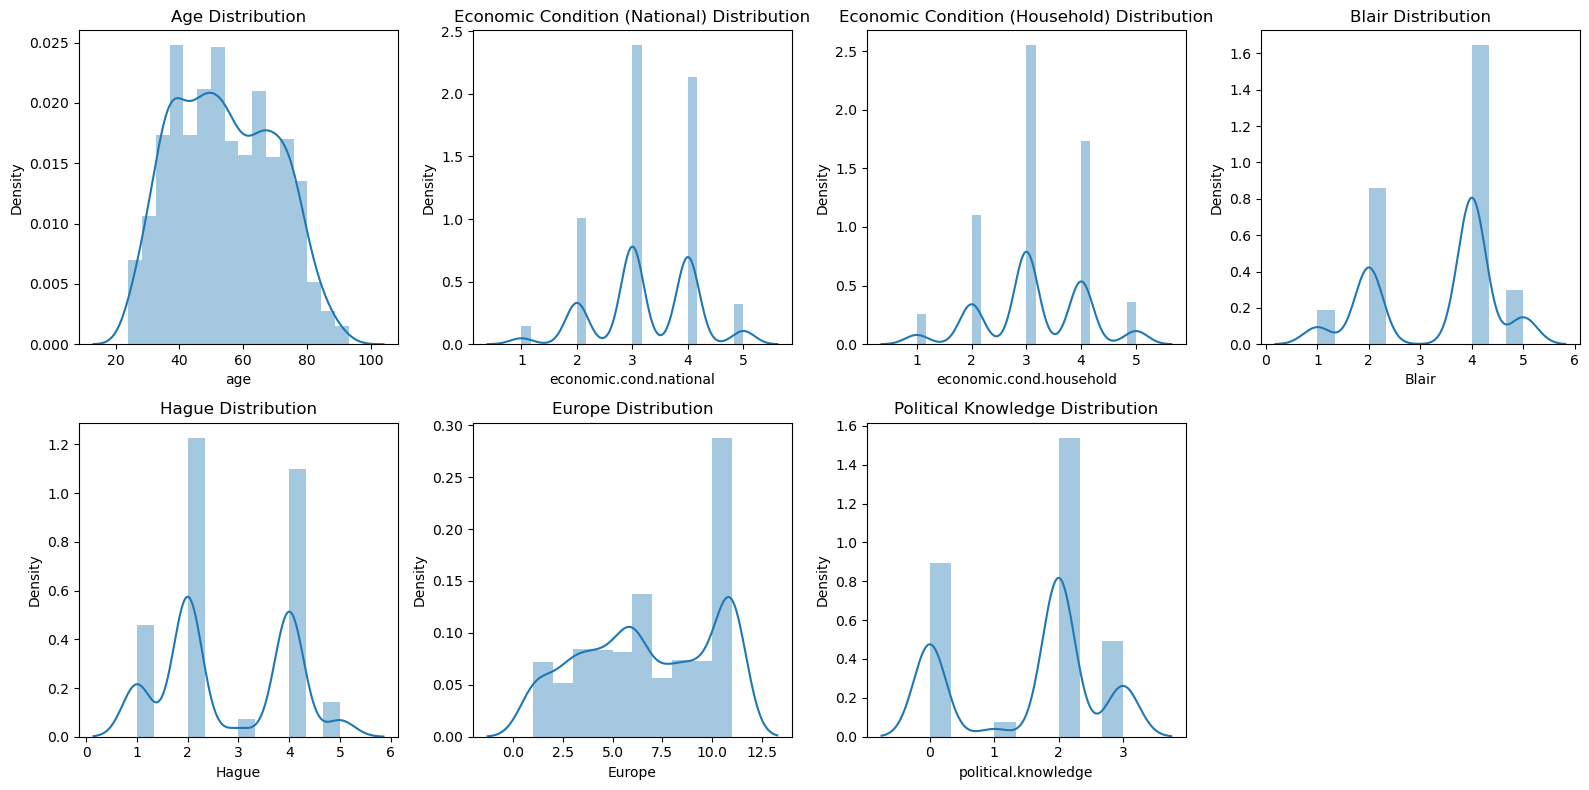

In [19]:
# Create a 2x4 grid of subplots
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

# Plot distribution plots for the specified columns
sns.distplot(CNBE['age'], ax=axes[0, 0])
axes[0, 0].set_title("Age Distribution", fontsize=12)

sns.distplot(CNBE['economic.cond.national'], ax=axes[0, 1])
axes[0, 1].set_title("Economic Condition (National) Distribution", fontsize=12)

sns.distplot(CNBE['economic.cond.household'], ax=axes[0, 2])
axes[0, 2].set_title("Economic Condition (Household) Distribution", fontsize=12)

sns.distplot(CNBE['Blair'], ax=axes[0, 3])
axes[0, 3].set_title("Blair Distribution", fontsize=12)

sns.distplot(CNBE['Hague'], ax=axes[1, 0])
axes[1, 0].set_title("Hague Distribution", fontsize=12)

sns.distplot(CNBE['Europe'], ax=axes[1, 1])
axes[1, 1].set_title("Europe Distribution", fontsize=12)

sns.distplot(CNBE['political.knowledge'], ax=axes[1, 2])
axes[1, 2].set_title("Political Knowledge Distribution", fontsize=12)

# Remove the empty subplot
fig.delaxes(axes[1, 3])

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

* According to distplot, only age is normally distributed and has a slightly right-skewed distribution. There may be a slightly higher concentration of younger voters in the dataset compared to older voters.

<span style="font-size: 20px; color: green; font-weight: bold;">Boxplot.</span>

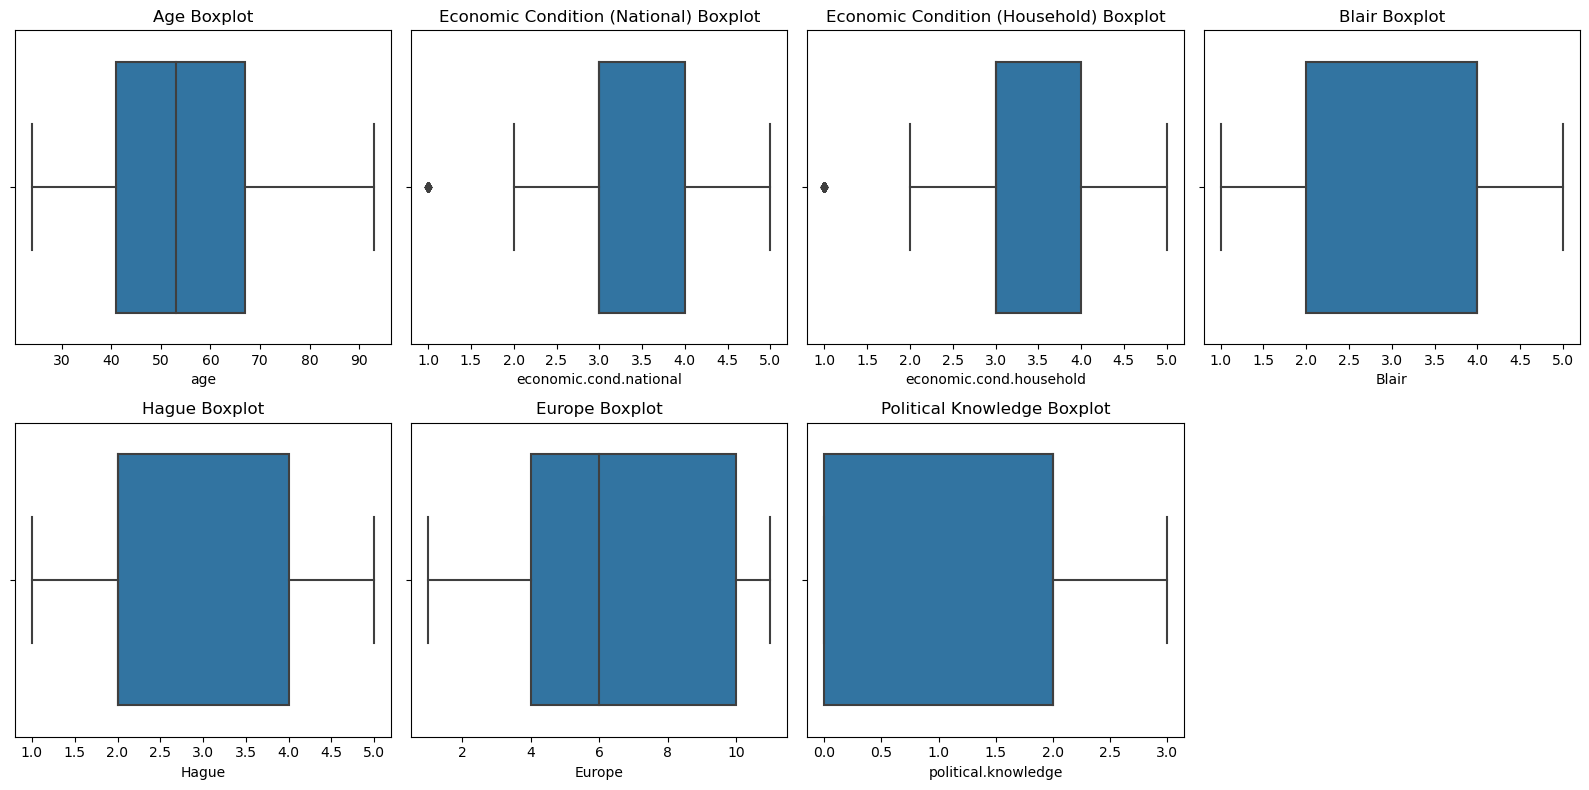

In [20]:
# Create a 2x4 grid of subplots
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

# Plot boxplots for the specified columns
sns.boxplot(data=CNBE, x='age', ax=axes[0, 0])
axes[0, 0].set_title("Age Boxplot", fontsize=12)

sns.boxplot(data=CNBE, x='economic.cond.national', ax=axes[0, 1])
axes[0, 1].set_title("Economic Condition (National) Boxplot", fontsize=12)

sns.boxplot(data=CNBE, x='economic.cond.household', ax=axes[0, 2])
axes[0, 2].set_title("Economic Condition (Household) Boxplot", fontsize=12)

sns.boxplot(data=CNBE, x='Blair', ax=axes[0, 3])
axes[0, 3].set_title("Blair Boxplot", fontsize=12)

sns.boxplot(data=CNBE, x='Hague', ax=axes[1, 0])
axes[1, 0].set_title("Hague Boxplot", fontsize=12)

sns.boxplot(data=CNBE, x='Europe', ax=axes[1, 1])
axes[1, 1].set_title("Europe Boxplot", fontsize=12)

sns.boxplot(data=CNBE, x='political.knowledge', ax=axes[1, 2])
axes[1, 2].set_title("Political Knowledge Boxplot", fontsize=12)

# Remove the empty subplot
fig.delaxes(axes[1, 3])

# Adjust spacing between subplots 
plt.tight_layout()

# Display the plots
plt.show()

* According to Boxplot,`economic.cond.national` and `economic.cond.household` have outliers.

<span style="font-size: 20px; color: blue; font-weight: bold;">Univariate Analysis of Object Features.</span>

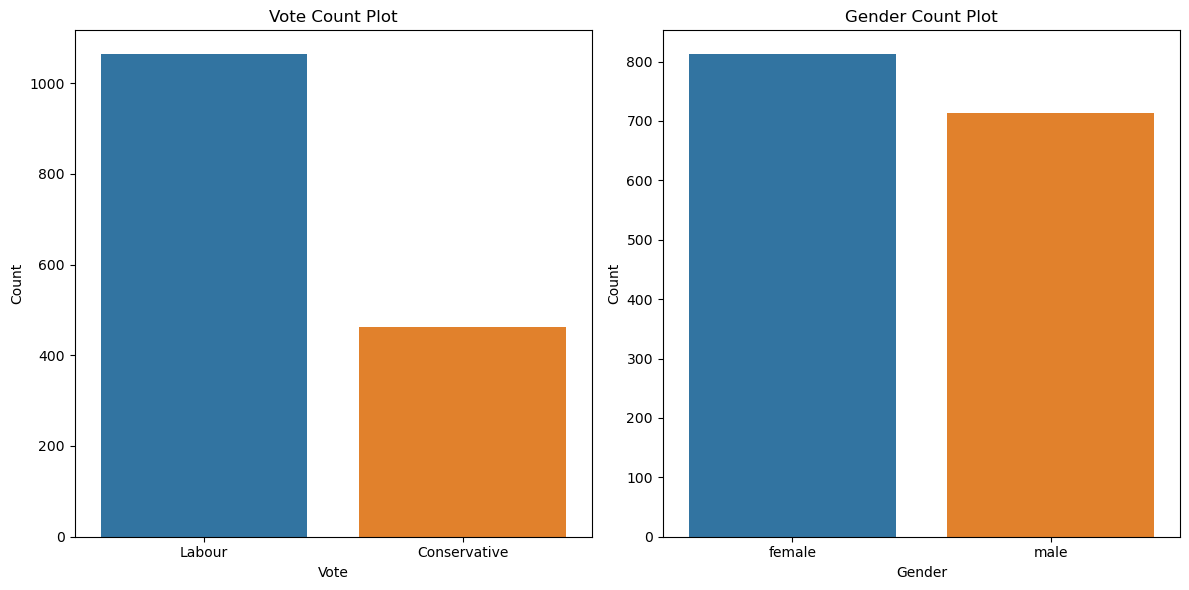

In [21]:
# Create a 1x2 grid of subplots for count plots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot count plots for 'vote' and 'gender'
sns.countplot(data=CNBE, x='vote', ax=axes[0])
axes[0].set_title("Vote Count Plot", fontsize=12)
axes[0].set_xlabel("Vote", fontsize=10)
axes[0].set_ylabel("Count", fontsize=10)

sns.countplot(data=CNBE, x='gender', ax=axes[1])
axes[1].set_title("Gender Count Plot", fontsize=12)
axes[1].set_xlabel("Gender", fontsize=10)
axes[1].set_ylabel("Count", fontsize=10)

# Adjust spacing between subplots
plt.tight_layout()

# Display the count plots
plt.show()

* According to Subplot, the Labour gives more than 1000 votes, while the Conservative gives more than 400. In the comparison between Labour and Conservatives, Labor gets more votes.
* According to the subplot, the female gives more than 800 votes, while the male gives more than 700. In the comparison between females and males, females get more votes, but the difference in votes is less, or a smaller difference.

<span style="font-size: 20px; color: green; font-weight: bold;">Countplot.</span>

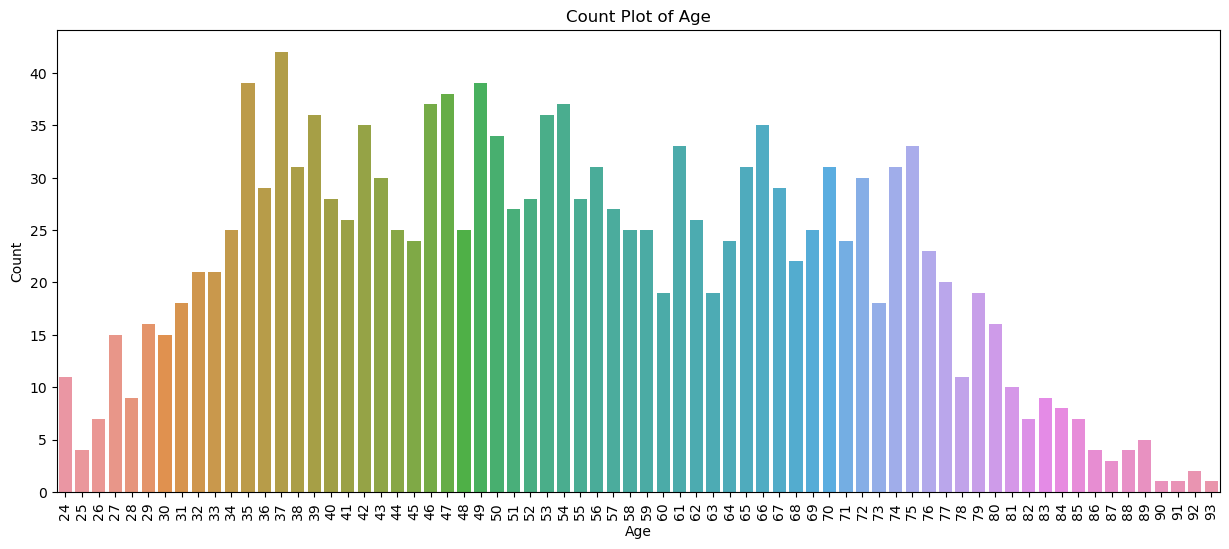

In [22]:
# Create a count plot for 'age'
plt.figure(figsize=(15, 6))  # Set the figure size
sns.countplot(data=CNBE, x='age')
plt.title("Count Plot of Age", fontsize=12)
plt.xlabel("Age", fontsize=10)
plt.ylabel("Count", fontsize=10)

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=90)

# Display the count plot
plt.show()

* According to Countplot, the minimum age of a voter is 24 and the maximum age is 93. Here, voters between the ages of 37 and 90-93 cast the most votes.

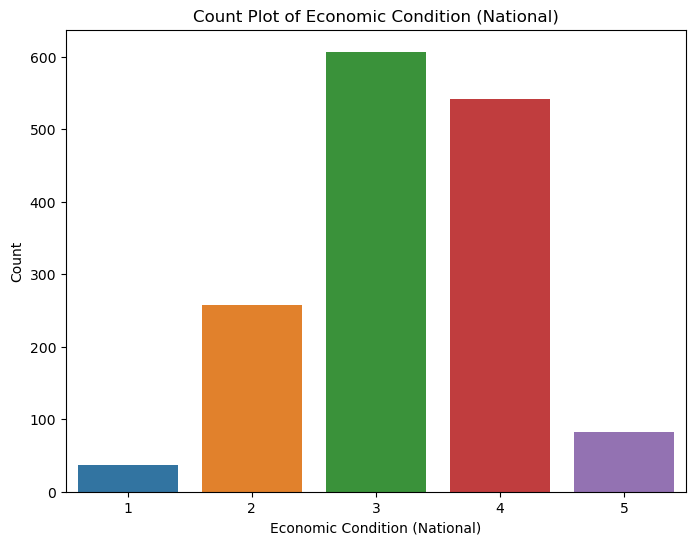

In [23]:
# Create a count plot for 'economic.cond.national'
plt.figure(figsize=(8, 6))  # Set the figure size
sns.countplot(data=CNBE, x='economic.cond.national')
plt.title("Count Plot of Economic Condition (National)", fontsize=12)
plt.xlabel("Economic Condition (National)", fontsize=10)
plt.ylabel("Count", fontsize=10)

# Display the count plot
plt.show()

* Here, Economic Condition (National) has 5 values, and the 3rd value has approximately 600 counts.

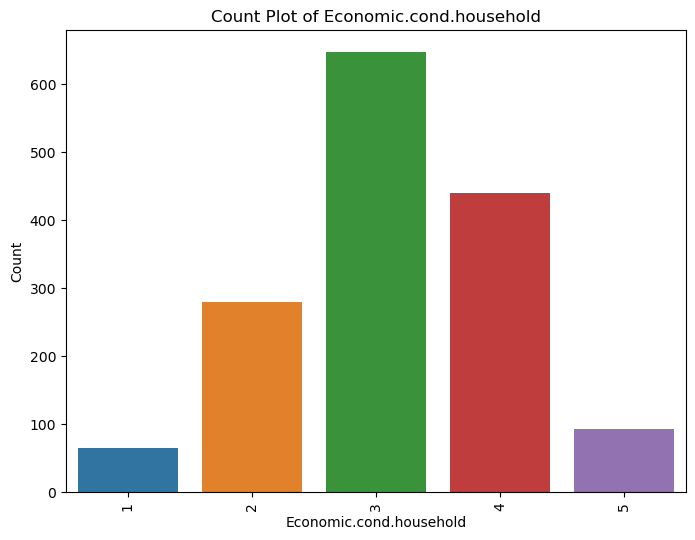

In [24]:
# Create a count plot for 'economic.cond.household'
plt.figure(figsize=(8, 6))  # Set the figure size
sns.countplot(data=CNBE, x='economic.cond.household')
plt.title("Count Plot of Economic.cond.household", fontsize=12)
plt.xlabel("Economic.cond.household", fontsize=10)
plt.ylabel("Count", fontsize=10)

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=90)

# Display the count plot
plt.show()

* Here, Economic.cond.household has 5 values, and the 3rd value has more than 600 counts.

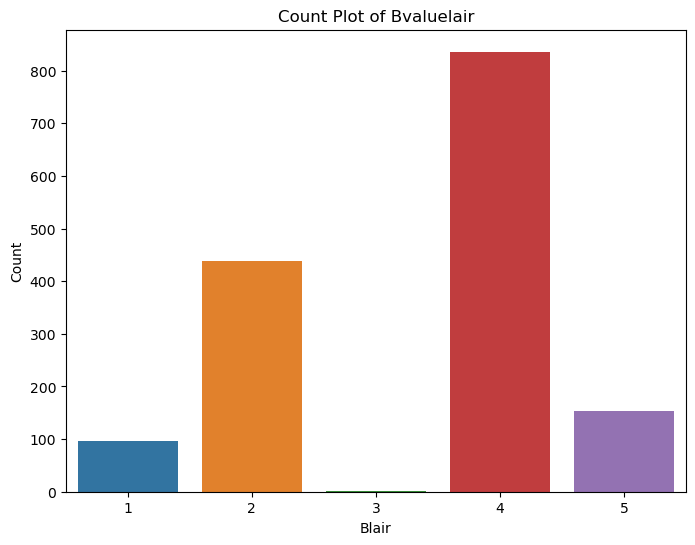

In [25]:
# Create a count plot for 'Blair'
plt.figure(figsize=(8, 6))  # Set the figure size
sns.countplot(data=CNBE, x='Blair')
plt.title("Count Plot of Bvaluelair", fontsize=12)
plt.xlabel("Blair", fontsize=10)
plt.ylabel("Count", fontsize=10)

# Display the count plot
plt.show()

* Here, Blair has 5 values, and the 4th value has more than 800 counts, and the 3rd value has very few counts.

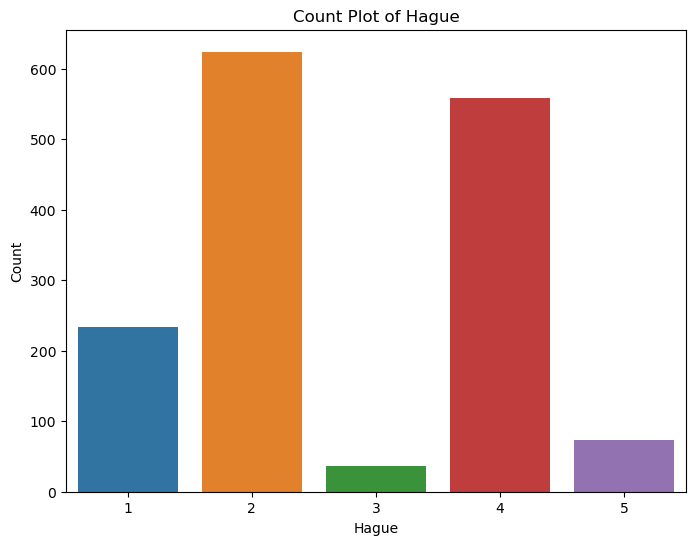

In [26]:
# Create a count plot for 'Blair'
plt.figure(figsize=(8, 6))  # Set the figure size
sns.countplot(data=CNBE, x='Hague')
plt.title("Count Plot of Hague", fontsize=12)
plt.xlabel("Hague", fontsize=10)
plt.ylabel("Count", fontsize=10)

# Display the count plot
plt.show()

* Here, Hague has 5 values, and the 2nd value has more than 600 counts.

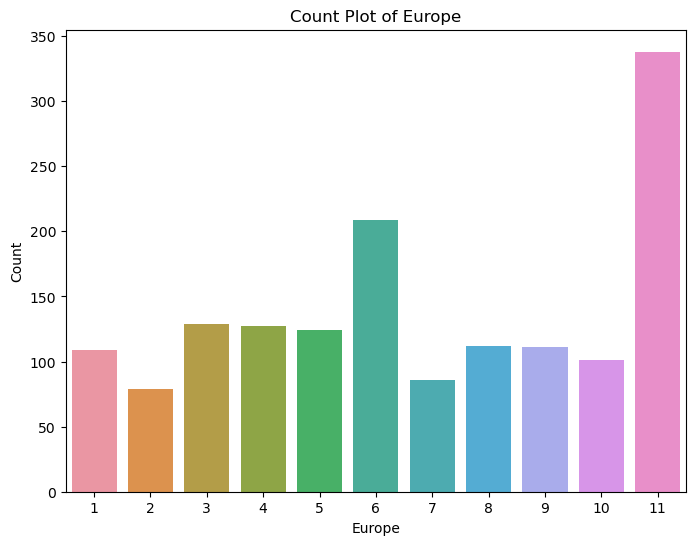

In [27]:
# Create a count plot for 'Blair'
plt.figure(figsize=(8, 6))  # Set the figure size
sns.countplot(data=CNBE, x='Europe')
plt.title("Count Plot of Europe", fontsize=12)
plt.xlabel("Europe", fontsize=10)
plt.ylabel("Count", fontsize=10)

# Display the count plot
plt.show()

* Here, Europe has 11 Values, and the 11th value has approx 340 counts.

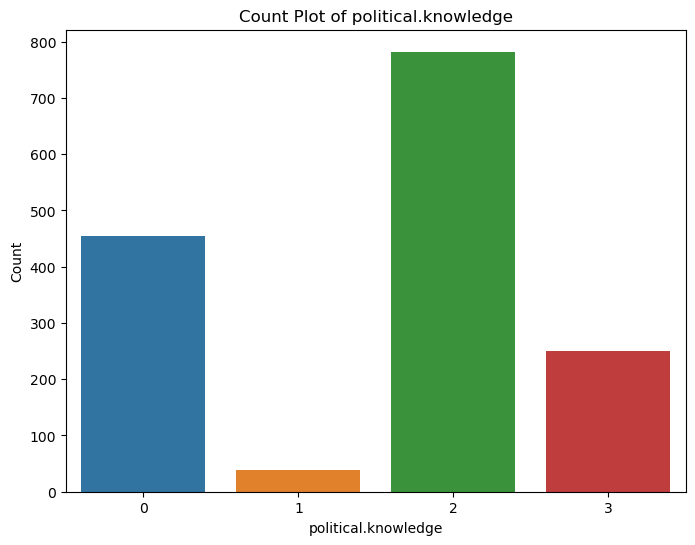

In [28]:
# Create a count plot for 'Blair'
plt.figure(figsize=(8, 6))  # Set the figure size
sns.countplot(data=CNBE, x='political.knowledge')
plt.title("Count Plot of political.knowledge", fontsize=12)
plt.xlabel("political.knowledge", fontsize=10)
plt.ylabel("Count", fontsize=10)

# Display the count plot
plt.show()

* Here, political.knowledge has 4(0-3) Values, and the 2nd value has approx 780 counts.

In [29]:
print(CNBE.columns)

Index(['vote', 'age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender'],
      dtype='object')


<span style="font-size: 20px; color: blue; font-weight: bold;">Bivariate Analysis</span>

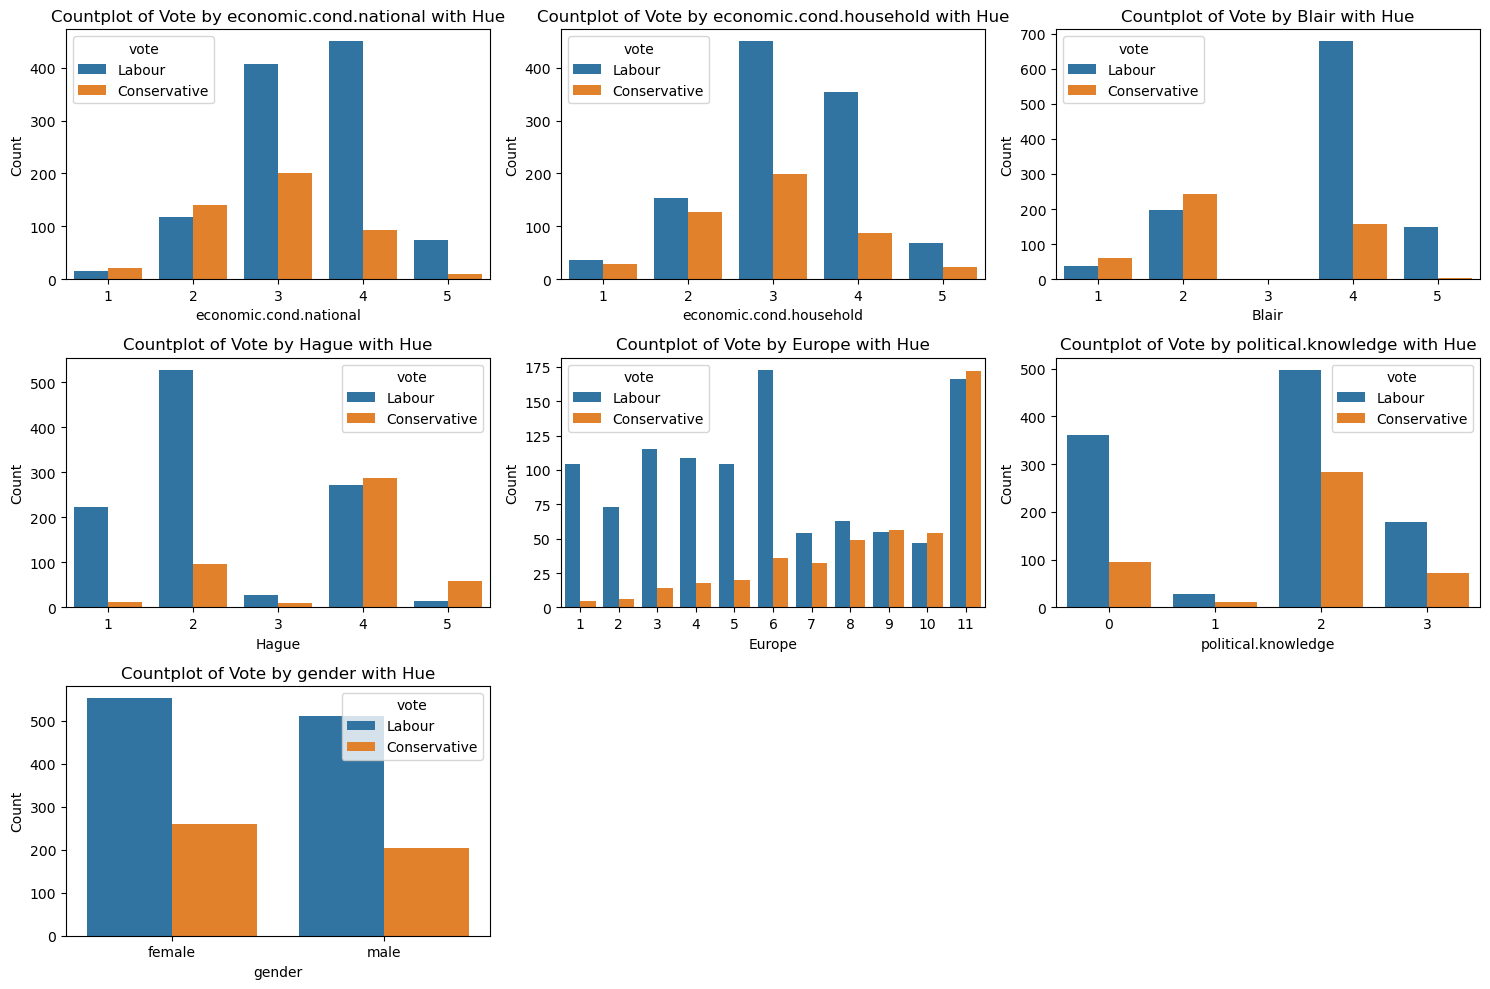

In [30]:
# Define the list of columns to create count plots for
columns_to_plot = ['economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender']

# Create subplots to display count plots for each column
plt.figure(figsize=(15, 10))

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=column, hue='vote', data=CNBE)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'Countplot of Vote by {column} with Hue')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


* Labour gets the highest voting from both female and male voters. Almost in all the categories Labour is getting the maximum votes. 
* Conservative gets a little bit high votes from Europe ‘11’

<span style="font-size: 20px; color: blue; font-weight: bold;">Multivariate Analysis</span>

<span style="font-size: 20px; color: green; font-weight: bold;">Pair Plot</span>

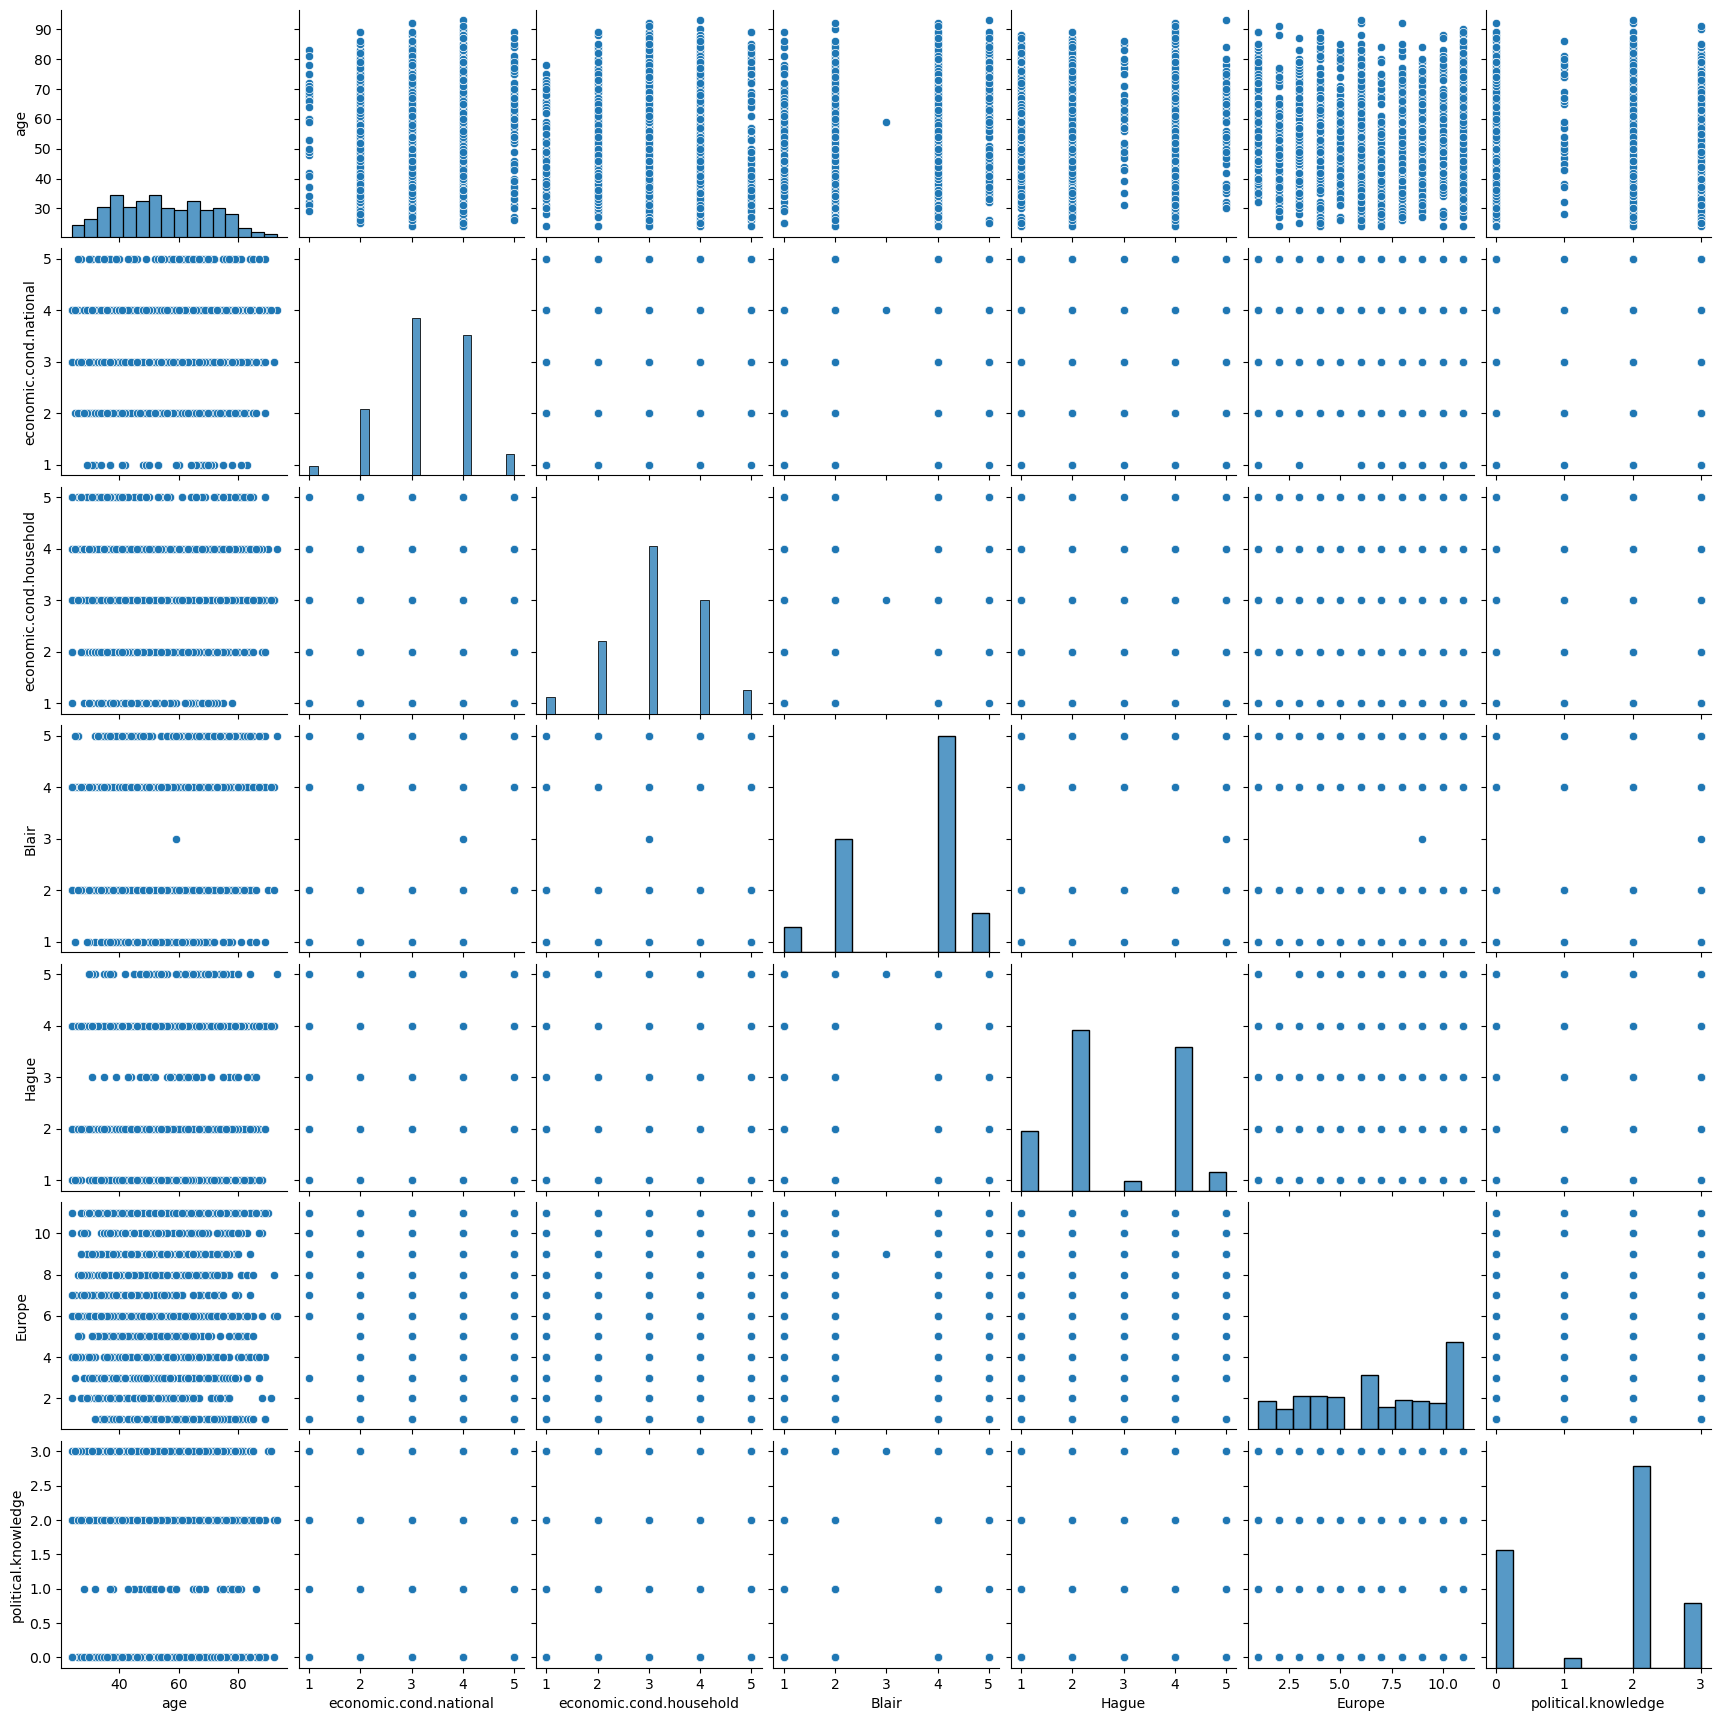

In [31]:
sns.pairplot(CNBE)

<span style="font-size: 20px; color: green; font-weight: bold;">Pair Plot with hue Vote</span>

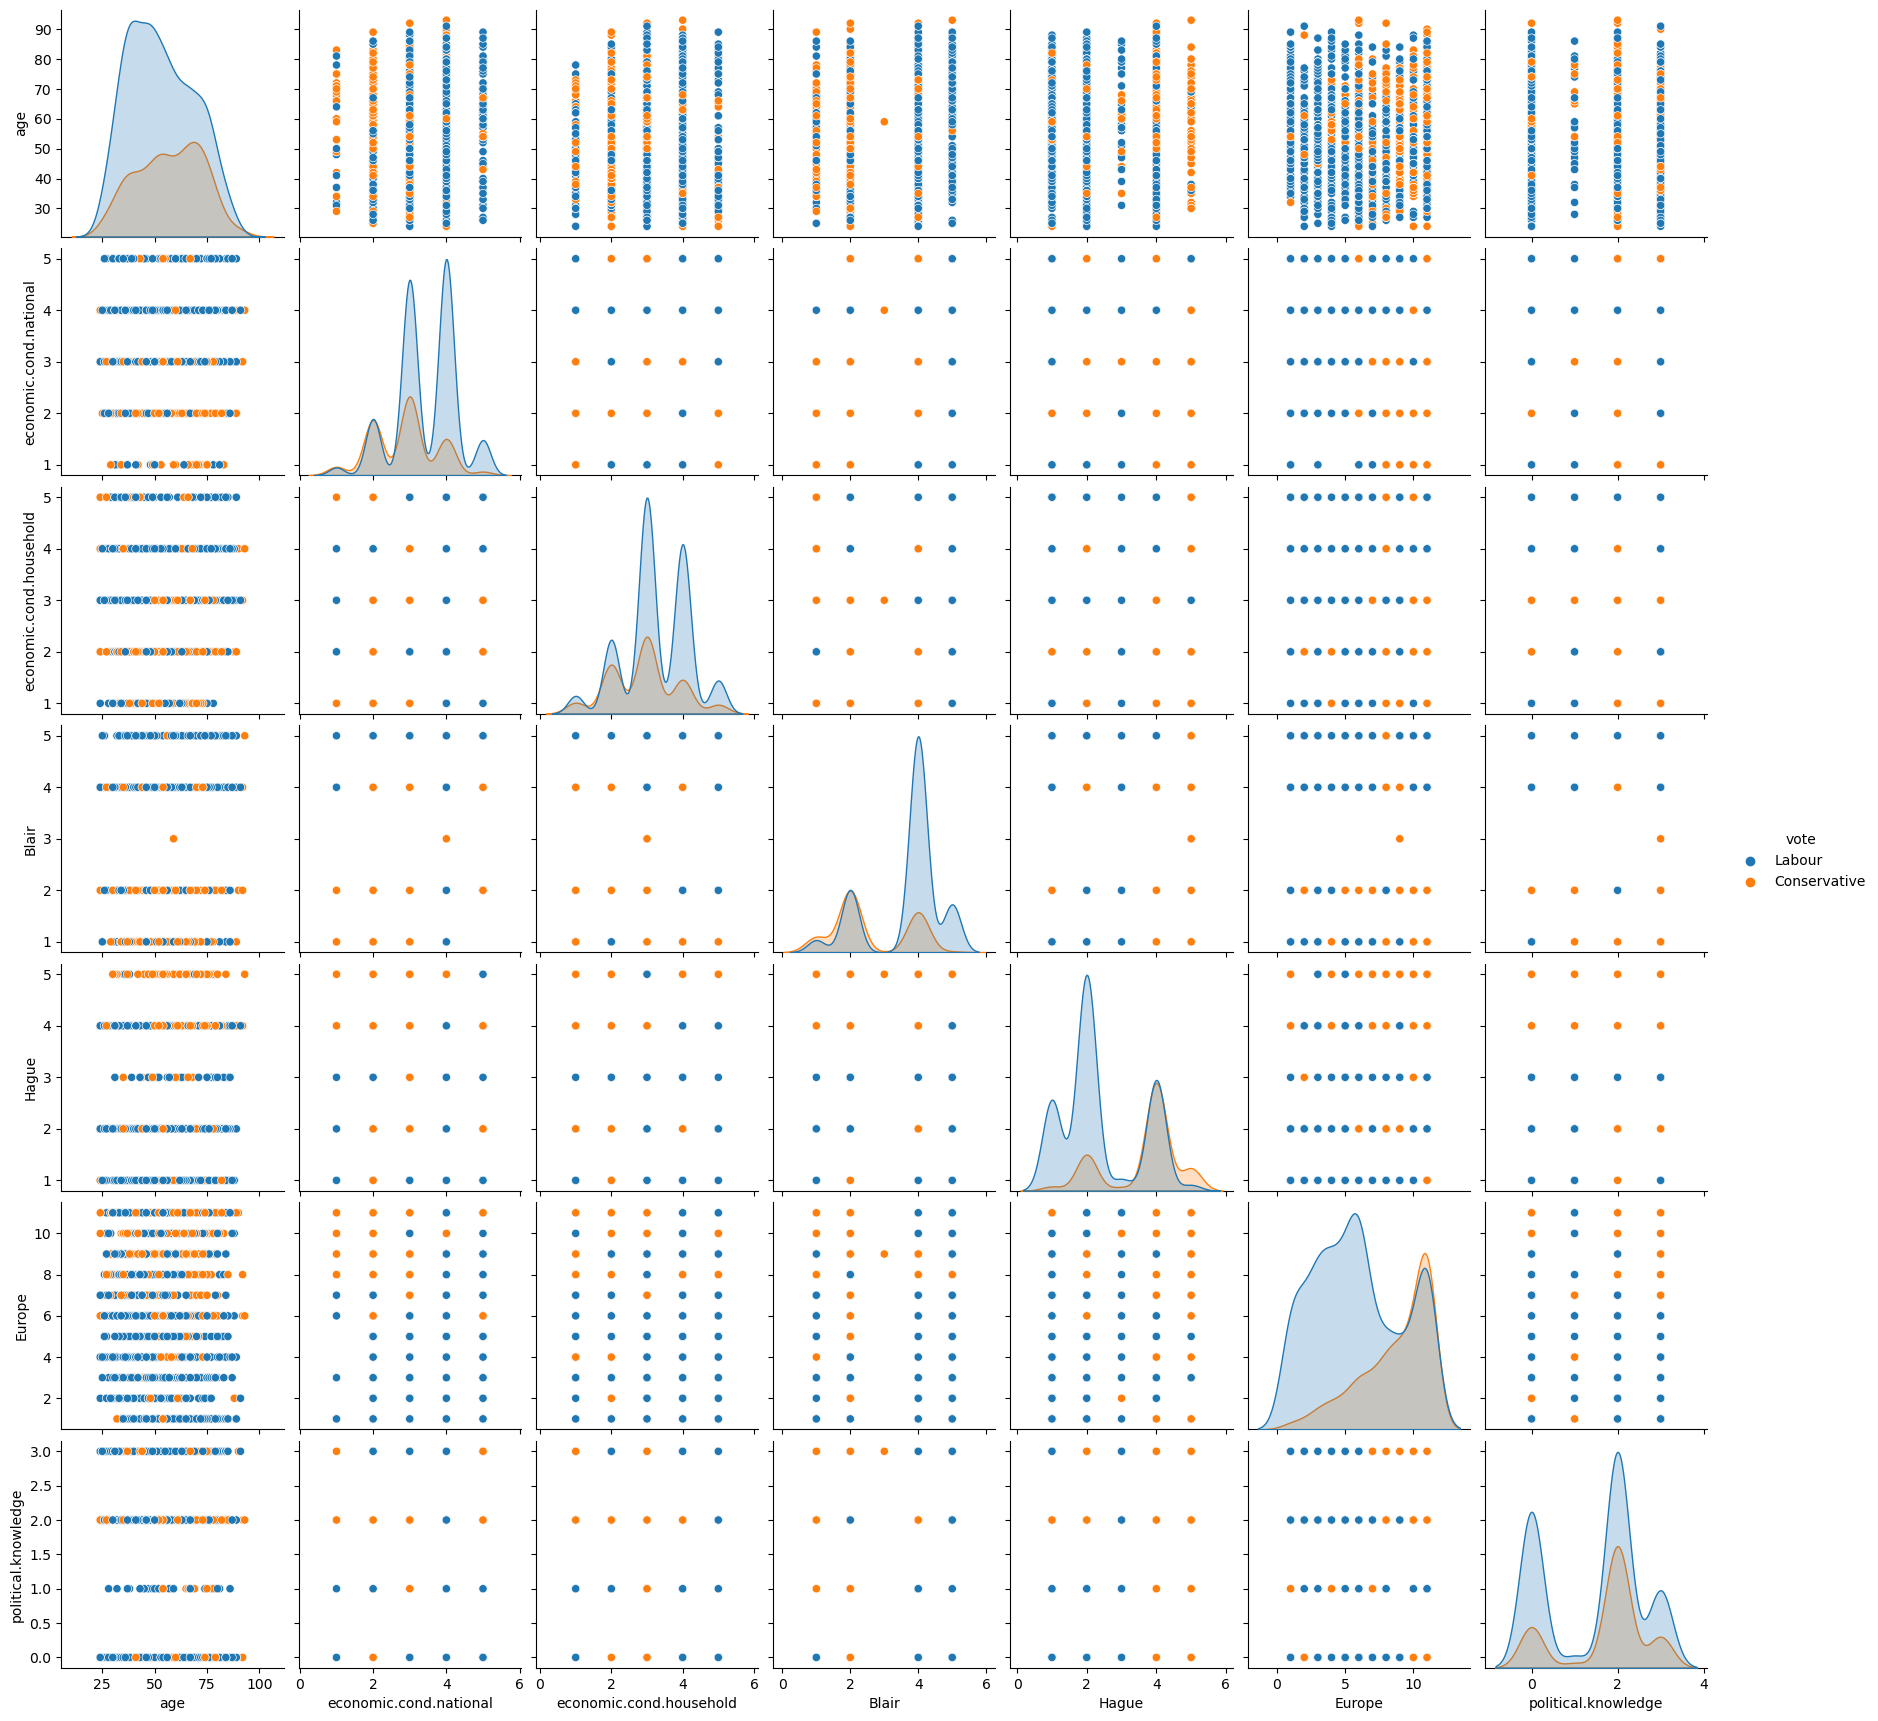

In [32]:
sns.pairplot(CNBE,hue='vote')

<span style="font-size: 20px; color: green; font-weight: bold;">Heatmap with hue Vote</span>

<Axes: >

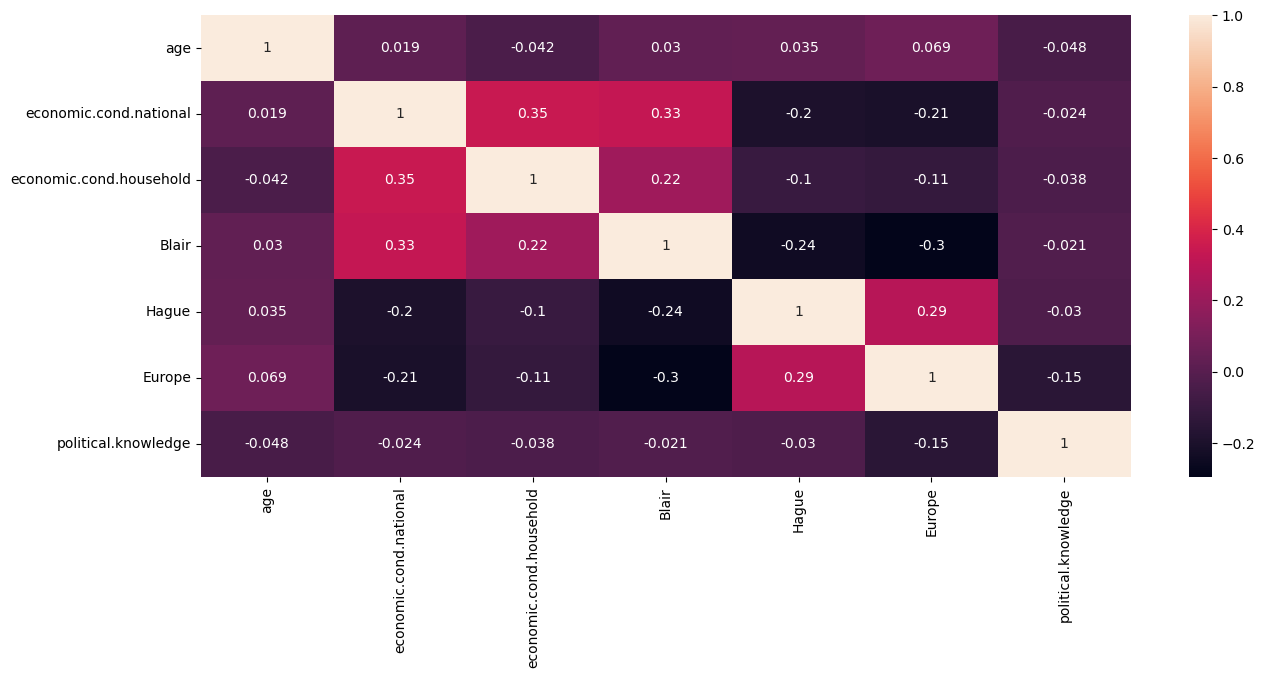

In [33]:
plt.figure(figsize=(15,6))
sns.heatmap(CNBE.corr(),annot=True)

* There is no correlation between the variables.

<span style="font-size: 20px; color: green; font-weight: bold;">Box Plot Before Outliers Treatment</span>

<Axes: >

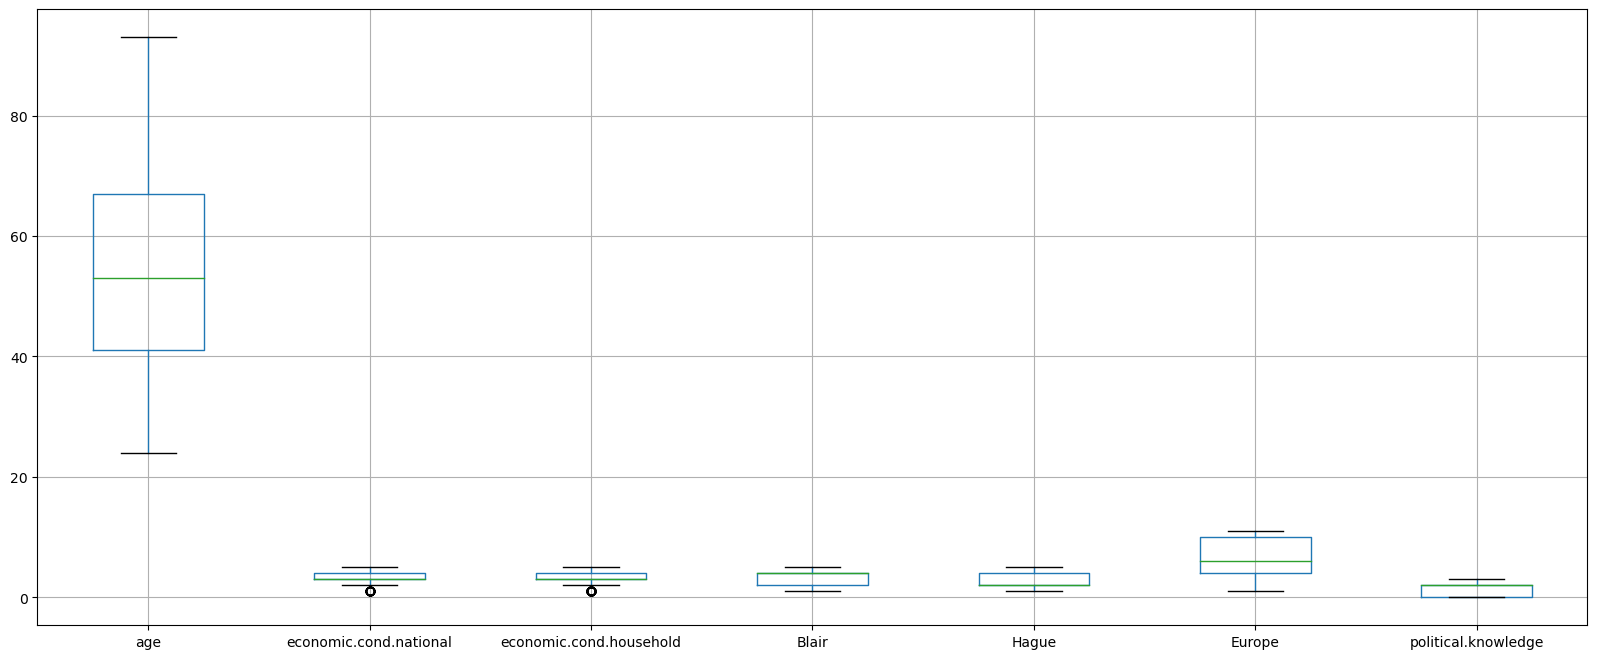

In [34]:
plt.figure(figsize=(20,8))
CNBE.boxplot()

<span style="font-size: 20px; color: blue; font-weight: bold;">Outlier Treatement</span>

In [35]:
def remove_outliers(col):
    min_val,max_val = col.quantile([0.25,0.75])
    return min_val,max_val

In [36]:
numerical_columns = ['age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge']

In [37]:
for column in numerical_columns:
    LL, UL = remove_outliers(CNBE[column])
    CNBE[column] = np.where(CNBE[column] > UL, UL, CNBE[column])
    CNBE[column] = np.where(CNBE[column] < LL, LL, CNBE[column])

In [38]:
len(numerical_columns)

7

<span style="font-size: 20px; color: green; font-weight: bold;">Box Plot After Outliers Treatment</span>

<Axes: >

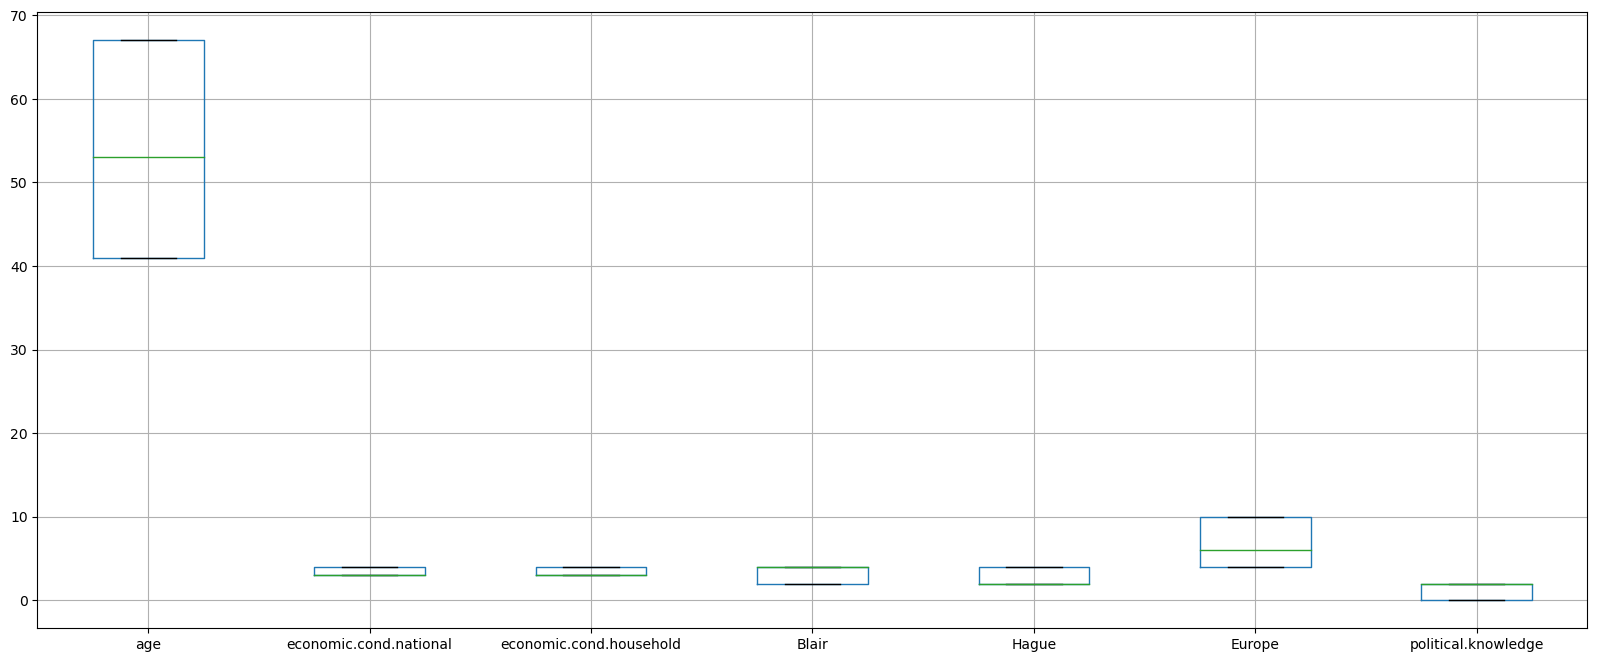

In [39]:
plt.figure(figsize=(20,8))
CNBE.boxplot()

**Insights:**
* The "age" column follows a slightly right-skewed distribution, suggesting a higher concentration of younger voters compared to older ones.
* Both "economic.cond.national" and "economic.cond.household" have outliers, as indicated by boxplots. Remove the outlier using outlier treatment.
* The "Labour" party received more than 1000 votes, while the "Conservative" party received more than 400 votes.
* In the comparison between "Labour" and "Conservatives," "Labour" received more votes.
* Females received more than 800 votes, while males received more than 700 votes.
* Females received more votes, but the difference in votes between genders is relatively small.
* The minimum age of a voter is 24, and the maximum age is 93.
* The age group between 37 and 90-93 has the highest number of voters.
* "Economic.cond.national" has 5 values, with the 3rd value having approximately 600 counts.
* "Economic.cond.household" has 5 values, with the 3rd value having more than 600 counts.
* "Blair" has 5 values, with the 4th value having more than 800 counts, and the 3rd value having very few counts.
* "Hague" has 5 values, with the 2nd value having more than 600 counts.
* "Europe" has 11 values, with the 11th value having approximately 340 counts.
* "Political.knowledge" has 4 (0-3) values, with the 2nd value having approximately 780 counts.
* "Labour" received the highest number of votes from both female and male voters, dominating in all categories.
* "Conservative" received slightly higher votes from Europe '11'.
* There appears to be no significant correlation between the variables, they are relatively independent of each other.

### 1.3) Encode the data (having string values) for Modelling. Is Scaling necessary here or not?( 2 pts), Data Split: Split the data into train and test (70:30) (2 pts). The learner is expected to check and comment about the difference in scale of different features on the bases of appropriate measure for example std dev, variance, etc. Should justify whether there is a necessity for scaling. Object data should be converted into categorical/numerical data to fit in the models. (pd.categorical().codes(), pd.get_dummies(drop_first=True)) Data split, ratio defined for the split, train-test split should be discussed.

* As many machine learning modes cannot work with string values, we will encode the categorical variables and convert their datatypes to integers. According to the dataset, there are 2 categorical-type variables, so encode these 2 variables.

<span style="font-size: 20px; color: blue; font-weight: bold;">Encode the data</span>

In [40]:
for feature in CNBE.columns:
    if CNBE[feature].dtype == 'object':
        print(feature.upper(), " ", CNBE[feature].nunique())
        print(CNBE[feature].value_counts().sort_values())

VOTE   2
Conservative     462
Labour          1063
Name: vote, dtype: int64
GENDER   2
male      713
female    812
Name: gender, dtype: int64


* From the above results we can see that both variables contain only two classifications of data in them. We can use dummy encoding.

In [41]:
CNBE = pd.get_dummies(CNBE,drop_first=True)

In [42]:
CNBE.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,vote_Labour,gender_male
0,43.0,3.0,3.0,4.0,2.0,4.0,2.0,1,0
1,41.0,4.0,4.0,4.0,4.0,5.0,2.0,1,1
2,41.0,4.0,4.0,4.0,2.0,4.0,2.0,1,1
3,41.0,4.0,3.0,2.0,2.0,4.0,0.0,1,0
4,41.0,3.0,3.0,2.0,2.0,6.0,2.0,1,1


In [43]:
CNBE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      1525 non-null   float64
 1   economic.cond.national   1525 non-null   float64
 2   economic.cond.household  1525 non-null   float64
 3   Blair                    1525 non-null   float64
 4   Hague                    1525 non-null   float64
 5   Europe                   1525 non-null   float64
 6   political.knowledge      1525 non-null   float64
 7   vote_Labour              1525 non-null   uint8  
 8   gender_male              1525 non-null   uint8  
dtypes: float64(7), uint8(2)
memory usage: 86.5 KB


<span style="font-size: 20px; color: blue; font-weight: bold;">Scaling the data using SVM</span>

* Scaling guarantees that all characteristics contribute equally to the learning process of the model. Features with bigger scales (e.g., greater numerical values) might dominate the learning procedure and have a disproportionate influence on the model's predictions if they are not scaled. Scaling prevents this imbalance and allows the model to take all features fairly into account.
* For this dataset, use SVM (Support Vector Machines) for scaling.

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialize the StandardScaler
scaler = StandardScaler()

In [45]:
# Select the columns you want to scale
columns_to_scale = ['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']

In [46]:
data = CNBE.copy()

In [47]:
# Fit and transform the selected columns
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

In [48]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1525.0,-1.607457e-16,1.000328,-1.208457,-1.208457,-0.075935,1.245342,1.245342
economic.cond.national,1525.0,-2.679096e-16,1.000328,-0.832204,-0.832204,-0.832204,1.201628,1.201628
economic.cond.household,1525.0,3.890513e-16,1.000328,-0.731950,-0.731950,-0.731950,1.366214,1.366214
Blair,1525.0,-2.154925e-16,1.000328,-1.359829,-1.359829,0.735916,0.735916,0.735916
Hague,1525.0,-5.358191e-17,1.000328,-0.872200,-0.872200,-0.872200,1.175691,1.175691
Europe,1525.0,-1.723940e-16,1.000328,-1.184859,-1.184859,-0.370385,1.258562,1.258562
political.knowledge,1525.0,9.085628e-17,1.000328,-1.511196,-1.511196,0.681548,0.681548,0.681548
vote_Labour,1525.0,6.970492e-01,0.459685,0.000000,0.000000,1.000000,1.000000,1.000000
gender_male,1525.0,4.675410e-01,0.499109,0.000000,0.000000,0.000000,1.000000,1.000000


* The mean for each variable is very close to zero, which is a characteristic of scaled data. 
* The standard deviation for each variable is very close to one, indicating that the variables have been scaled to have the same standard deviation.

<span style="font-size: 20px; color: blue; font-weight: bold;">Split the data into train and test (70:30)</span>

In [49]:
X = data.drop('vote_Labour', axis=1)  # Features (excluding the target variable)
y = data['vote_Labour']  # Target variable

In [50]:
# Split the data into a 70% training set and a 30% test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [51]:
X_train.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
1372,1.245342,1.201628,1.366214,0.735916,-0.872200,-1.184859,0.681548,1
126,-0.736573,1.201628,-0.731950,0.735916,1.175691,-1.184859,0.681548,1
327,1.245342,-0.832204,-0.731950,-1.359829,1.175691,0.851325,0.681548,1
292,-0.264688,-0.832204,-0.731950,0.735916,-0.872200,-0.370385,-0.414824,0
1058,-1.208457,-0.832204,1.366214,0.735916,-0.872200,0.444088,-1.511196,0


In [52]:
X_test.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
782,-1.208457,1.201628,1.366214,0.735916,-0.872200,-0.370385,0.681548,1
76,-1.114080,1.201628,-0.731950,0.735916,-0.872200,-1.184859,0.681548,0
1009,-1.208457,1.201628,-0.731950,0.735916,-0.872200,-1.184859,-0.414824,0
1403,-0.547819,-0.832204,-0.731950,-1.359829,1.175691,-1.184859,0.681548,0
846,-1.208457,-0.832204,1.366214,-1.359829,-0.872200,1.258562,0.681548,0


In [53]:
y_train.head()

1372    1
126     1
327     0
292     1
1058    1
Name: vote_Labour, dtype: uint8

In [54]:
y_test.head()

782     1
76      1
1009    1
1403    0
846     0
Name: vote_Labour, dtype: uint8

In [55]:
y_train.value_counts(1)

1    0.691659
0    0.308341
Name: vote_Labour, dtype: float64

In [56]:
y_test.value_counts(1)

1    0.709607
0    0.290393
Name: vote_Labour, dtype: float64

**Insights:**
* Scaling guarantees that all characteristics contribute equally to the learning process of the model. Features with bigger scales (e.g., greater numerical values) might dominate the learning procedure and have a disproportionate influence on the model's predictions if they are not scaled. Scaling prevents this imbalance and allows the model to take all features fairly into account.
* For this dataset, use SVM (Support Vector Machines) for scaling.
* After apply SVM, The mean for each variable is very close to zero, which is a characteristic of scaled data. The standard deviation for each variable is very close to one, indicating that the variables have been scaled to have the same standard deviation.
* X_train denotes 70% training dataset with 8 columns are known as Predictor Variables.
* X_test denotes 30% training dataset with 8 columns are known as Predictor Variables.
* y_train denotes 70% training dataset with only one column are known as Target Variables.
* y_test denotes 30% training dataset with only one columns are known as Target Variables.

### 1.4) Apply Logistic Regression and LDA (Linear Discriminant Analysis) (2 pts). Interpret the inferences of both model s (2 pts). Successful implementation of each model. Logical reason should be shared if any custom changes are made to the parameters while building the model. Calculate Train and Test Accuracies for each model. Comment on the validness of models (over fitting or under fitting)

<span style="font-size: 20px; color: blue; font-weight: bold;">Logistic Regression</span>

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

In [58]:
# Create and train the Logistic Regression model
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [59]:
# Predict on the training and testing data
y_train_pred_logistic = logistic_model.predict(X_train)
y_test_pred_logistic = logistic_model.predict(X_test)

In [60]:
# Calculate train and test accuracies
train_accuracy_logistic = accuracy_score(y_train, y_train_pred_logistic)
test_accuracy_logistic = accuracy_score(y_test, y_test_pred_logistic)

print(f"Logistic Regression Train Accuracy: {train_accuracy_logistic:.4f}")
print(f"Logistic Regression Test Accuracy: {test_accuracy_logistic:.4f}")

Logistic Regression Train Accuracy: 0.8407
Logistic Regression Test Accuracy: 0.8035


In [61]:
# Calculate the confusion matrix for Logistic Regression on the training set
confusion_matrix_logistic_train = confusion_matrix(y_train, y_train_pred_logistic)

print("Confusion Matrix for Logistic Regression (Training Set):")
print(confusion_matrix_logistic_train)

# Print the classification report for Logistic Regression on the training set
classification_report_logistic_train = classification_report(y_train, y_train_pred_logistic)

print("Classification Report for Logistic Regression (Training Set):")
print(classification_report_logistic_train)

Confusion Matrix for Logistic Regression (Training Set):
[[223 106]
 [ 64 674]]
Classification Report for Logistic Regression (Training Set):
              precision    recall  f1-score   support

           0       0.78      0.68      0.72       329
           1       0.86      0.91      0.89       738

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067



In [63]:
# Calculate the confusion matrix for Logistic Regression on the testing set
confusion_matrix_logistic_test = confusion_matrix(y_test, y_test_pred_logistic)

print("Confusion Matrix for Logistic Regression (Testing Set):")
print(confusion_matrix_logistic_test)

# Print the classification report for Logistic Regression on the testing set
classification_report_logistic_test = classification_report(y_test, y_test_pred_logistic)

print("Classification Report for Logistic Regression (Testing Set):")
print(classification_report_logistic_test)

Confusion Matrix for Logistic Regression (Testing Set):
[[ 83  50]
 [ 40 285]]
Classification Report for Logistic Regression (Testing Set):
              precision    recall  f1-score   support

           0       0.67      0.62      0.65       133
           1       0.85      0.88      0.86       325

    accuracy                           0.80       458
   macro avg       0.76      0.75      0.76       458
weighted avg       0.80      0.80      0.80       458



**Insights:**
* The model performs well on the training set with an accuracy of 0.84, indicating that it fits the training data reasonably well.
* The high precision, recall, and F1-scores for both classes (0 and 1) on the training set suggest that the model has learned the patterns in the data effectively.
* The model also performs well on the testing set with an accuracy of 0.80, which is close to the training set accuracy. This suggests that the model is generalizing reasonably well to new, unseen data.
* There is no clear evidence of overfitting or underfitting. Both training and testing set performances are reasonably consistent, indicating that the model has found a good balance between capturing patterns in the training data and generalizing to the testing data.
* The similar values of precision, recall, and F1-score for both the training and testing sets indicate that the model performs consistently on both sets. It is a reliable and well-balanced model.

<span style="font-size: 20px; color: blue; font-weight: bold;">Linear Discriminant Analysis (LDA)</span>

In [64]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [65]:
# Create and train the LDA model
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [66]:
# Predict on the training and testing data
y_train_pred_lda = lda_model.predict(X_train)
y_test_pred_lda = lda_model.predict(X_test)

In [67]:
# Calculate train and test accuracies
train_accuracy_lda = accuracy_score(y_train, y_train_pred_lda)
test_accuracy_lda = accuracy_score(y_test, y_test_pred_lda)

print(f"LDA Train Accuracy: {train_accuracy_lda:.2f}")
print(f"LDA Test Accuracy: {test_accuracy_lda:.2f}")

LDA Train Accuracy: 0.84
LDA Test Accuracy: 0.80


In [68]:
# Calculate the confusion matrix for LDA on the training set
confusion_matrix_lda_train = confusion_matrix(y_train, y_train_pred_lda)

print("Confusion Matrix for LDA (Training Set):")
print(confusion_matrix_lda_train)

# Print the classification report for LDA on the training set
classification_report_lda_train = classification_report(y_train, y_train_pred_lda)

print("Classification Report for LDA (Training Set):")
print(classification_report_lda_train)

Confusion Matrix for LDA (Training Set):
[[229 100]
 [ 70 668]]
Classification Report for LDA (Training Set):
              precision    recall  f1-score   support

           0       0.77      0.70      0.73       329
           1       0.87      0.91      0.89       738

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067



In [69]:
# Calculate the confusion matrix for LDA on the testing set
confusion_matrix_lda_test = confusion_matrix(y_test, y_test_pred_lda)

print("Confusion Matrix for LDA (Testing Set):")
print(confusion_matrix_lda_test)

# Print the classification report for LDA on the testing set
classification_report_lda_test = classification_report(y_test, y_test_pred_lda)

print("Classification Report for LDA (Testing Set):")
print(classification_report_lda_test)

Confusion Matrix for LDA (Testing Set):
[[ 85  48]
 [ 43 282]]
Classification Report for LDA (Testing Set):
              precision    recall  f1-score   support

           0       0.66      0.64      0.65       133
           1       0.85      0.87      0.86       325

    accuracy                           0.80       458
   macro avg       0.76      0.75      0.76       458
weighted avg       0.80      0.80      0.80       458



**Insights:**
* The model performs well on the training set with an accuracy of 0.84, indicating that it fits the training data reasonably well.
* The high precision, recall, and F1-scores for both classes (0 and 1) on the training set suggest that the model has learned the patterns in the data effectively.
* The model also performs well on the testing set with an accuracy of 0.80, which is close to the training set accuracy. This suggests that the model is generalizing reasonably well to new, unseen data.
* There is no clear evidence of overfitting or underfitting. Both training and testing set performances are reasonably consistent, indicating that the model has found a good balance between capturing patterns in the training data and generalizing to the testing data.
* The consistency of metrics (precision, recall, F1-score) between the training and testing sets model's performance is stable and not exhibiting significant overfitting or underfitting tendencies.

### 1.5) Apply KNN Model and Naïve Bayes Model (2pts). Interpret the inferences of each model (2 pts). Successful implementation of each model. Logical reason should be shared if any custom changes are made to the parameters while building the model. Calculate Train and Test Accuracies for each model. Comment on the validness of models (over fitting or under fitting)

<span style="font-size: 20px; color: blue; font-weight: bold;">KNN Model</span>

In [70]:
from sklearn.neighbors import KNeighborsClassifier

In [71]:
# Create and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [72]:
# Predict on the training and testing data
y_train_pred_knn = knn_model.predict(X_train)
y_test_pred_knn = knn_model.predict(X_test)

In [73]:
# Calculate train and test accuracies
train_accuracy_knn = accuracy_score(y_train, y_train_pred_knn)
test_accuracy_knn = accuracy_score(y_test, y_test_pred_knn)

print(f"KNN Train Accuracy: {train_accuracy_knn:.2f}")
print(f"KNN Test Accuracy: {test_accuracy_knn:.2f}")

KNN Train Accuracy: 0.88
KNN Test Accuracy: 0.80


In [74]:
# Calculate the confusion matrix for KNN on the training set
confusion_matrix_knn_train = confusion_matrix(y_train, y_train_pred_knn)

print("Confusion Matrix for KNN (Training Set):")
print(confusion_matrix_knn_train)

# Print the classification report for KNN on the training set
classification_report_knn_train = classification_report(y_train, y_train_pred_knn)

print("Classification Report for KNN (Training Set):")
print(classification_report_knn_train)

Confusion Matrix for KNN (Training Set):
[[254  75]
 [ 48 690]]
Classification Report for KNN (Training Set):
              precision    recall  f1-score   support

           0       0.84      0.77      0.81       329
           1       0.90      0.93      0.92       738

    accuracy                           0.88      1067
   macro avg       0.87      0.85      0.86      1067
weighted avg       0.88      0.88      0.88      1067



In [75]:
# Calculate the confusion matrix for KNN on the testing set
confusion_matrix_knn_test = confusion_matrix(y_test, y_test_pred_knn)

print("Confusion Matrix for KNN (Testing Set):")
print(confusion_matrix_knn_test)

# Print the classification report for KNN on the testing set
classification_report_knn_test = classification_report(y_test, y_test_pred_knn)

print("Classification Report for KNN (Testing Set):")
print(classification_report_knn_test)

Confusion Matrix for KNN (Testing Set):
[[ 86  47]
 [ 46 279]]
Classification Report for KNN (Testing Set):
              precision    recall  f1-score   support

           0       0.65      0.65      0.65       133
           1       0.86      0.86      0.86       325

    accuracy                           0.80       458
   macro avg       0.75      0.75      0.75       458
weighted avg       0.80      0.80      0.80       458



**Insights:**
* The model performs well on the training set with an accuracy of 0.84, indicating that it fits the training data reasonably well.
* The high precision, recall, and F1-scores for both classes (0 and 1) on the training set suggest that the model has learned the patterns in the data effectively.
* The model also performs well on the testing set with an accuracy of 0.80, which is close to the training set accuracy. This suggests that the model is generalizing reasonably well to new, unseen data.
* There is no clear evidence of overfitting or underfitting. Both training and testing set performances are reasonably consistent, indicating that the model has found a good balance between capturing patterns in the training data and generalizing to the testing data.
* The consistency of metrics (precision, recall, and F1-score) between the training and testing sets' performance is stable and does not exhibit significant overfitting or underfitting tendencies.

<span style="font-size: 20px; color: blue; font-weight: bold;">Naïve Bayes Model</span>

In [76]:
from sklearn.naive_bayes import GaussianNB

In [77]:
# Create and train the Naïve Bayes model
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)

GaussianNB()

In [78]:
# Predict on the training and testing data
y_train_pred_nb = naive_bayes_model.predict(X_train)
y_test_pred_nb = naive_bayes_model.predict(X_test)

In [79]:
# Calculate train and test accuracies
train_accuracy_nb = accuracy_score(y_train, y_train_pred_nb)
test_accuracy_nb = accuracy_score(y_test, y_test_pred_nb)

print(f"Naïve Bayes Train Accuracy: {train_accuracy_nb:.2f}")
print(f"Naïve Bayes Test Accuracy: {test_accuracy_nb:.2f}")

Naïve Bayes Train Accuracy: 0.84
Naïve Bayes Test Accuracy: 0.80


In [80]:
# Calculate the confusion matrix for Naïve Bayes Model on the training set
confusion_matrix_nb_train = confusion_matrix(y_train, y_train_pred_nb)

print("Confusion Matrix for Naïve Bayes Model (Training Set):")
print(confusion_matrix_nb_train)

# Print the classification report for Naïve Bayes Model on the training set
classification_report_nb_train = classification_report(y_train, y_train_pred_nb)

print("Classification Report for Naïve Bayes Model (Training Set):")
print(classification_report_nb_train)

Confusion Matrix for Naïve Bayes Model (Training Set):
[[242  87]
 [ 89 649]]
Classification Report for Naïve Bayes Model (Training Set):
              precision    recall  f1-score   support

           0       0.73      0.74      0.73       329
           1       0.88      0.88      0.88       738

    accuracy                           0.84      1067
   macro avg       0.81      0.81      0.81      1067
weighted avg       0.84      0.84      0.84      1067



In [81]:
# Calculate the confusion matrix for Naïve Bayes Model on the testing set
confusion_matrix_nb_test = confusion_matrix(y_test, y_test_pred_nb)

print("Confusion Matrix for Naïve Bayes Model (Testing Set):")
print(confusion_matrix_nb_test)

# Print the classification report for Naïve Bayes Model on the testing set
classification_report_nb_test = classification_report(y_test, y_test_pred_nb)

print("Classification Report for Naïve Bayes Model (Testing Set):")
print(classification_report_nb_test)

Confusion Matrix for Naïve Bayes Model (Testing Set):
[[ 90  43]
 [ 50 275]]
Classification Report for Naïve Bayes Model (Testing Set):
              precision    recall  f1-score   support

           0       0.64      0.68      0.66       133
           1       0.86      0.85      0.86       325

    accuracy                           0.80       458
   macro avg       0.75      0.76      0.76       458
weighted avg       0.80      0.80      0.80       458



**Insights:**
* The model performs well on the training set with an accuracy of 0.84, indicating that it fits the training data reasonably well.
* The high precision, recall, and F1-scores for both classes (0 and 1) on the training set suggest that the model has learned the patterns in the data effectively.
* The model also performs well on the testing set with an accuracy of 0.80, which is close to the training set accuracy. This suggests that the model is generalizing reasonably well to new, unseen data.
* There is no clear evidence of overfitting or underfitting. Both training and testing set performances are reasonably consistent, indicating that the model has found a good balance between capturing patterns in the training data and generalizing to the testing data.
* The consistency of metrics (precision, recall, F1-score) between the training and testing model's performance is stable and does not exhibit significant overfitting or underfitting tendencies.

### 1.6) Model Tuning (4 pts) , Bagging ( 1.5 pts) and Boosting (1.5 pts). Apply grid search on each model (include all models) and make models on best_params. Compare and comment on performances of all. Comment on feature importance if applicable. Successful implementation of both algorithms along with inferences and comments on the model performances.

<span style="font-size: 20px; color: blue; font-weight: bold;">To perform model tuning, bagging, and boosting, we will use Grid Search to find the best hyperparameters for the models. </span>

In [82]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier

<span style="font-size: 20px; color: green; font-weight: bold;">1. Logistic Regression with Grid Search</span>

In [83]:
# Define the hyperparameter grid for Logistic Regression
param_grid_logistic = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization parameter values
    'penalty': ['l1', 'l2']  # Regularization type: L1 (Lasso) or L2 (Ridge)
}

In [84]:
# Initialize the Logistic Regression model
logistic_model = LogisticRegression(random_state=42)

# Create a GridSearchCV object
grid_search_logistic = GridSearchCV(
    logistic_model,  # Model to tune
    param_grid_logistic,  # Hyperparameter grid to search
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',  # Evaluation metric
    n_jobs=-1  # Use all available CPU cores
)

In [85]:
# Fit the Grid Search to your training data
grid_search_logistic.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [86]:
# Get the best hyperparameters and best model from Grid Search
best_params_logistic = grid_search_logistic.best_params_
best_model_logistic = grid_search_logistic.best_estimator_

In [87]:
# Evaluate the best model on the test data
test_accuracy_logistic = best_model_logistic.score(X_test, y_test)


print("Best Hyperparameters for Logistic Regression:", best_params_logistic)
print("Test Accuracy for Logistic Regression:", test_accuracy_logistic)

Best Hyperparameters for Logistic Regression: {'C': 10, 'penalty': 'l2'}
Test Accuracy for Logistic Regression: 0.8034934497816594


**Insights:**
* Logistic Regression obtained an accuracy of 0.84 on the training set, meaning that it correctly predicted the class labels for 84% of the training data. It obtained a test accuracy of roughly 0.8035 on the test set using the best hyperparameters, suggesting that it correctly predicted the class labels for approximately 80.35% of the test data.
* A more extensive breakdown of the model's performance is provided by the confusion matrix and classification report. The model exhibits a decent mix of accuracy and recall for both classes (0 and 1) on both the training and test sets. The F1-scores, which are relatively high, reflect this equilibrium.
* The optimum hyperparameters were discovered to be ''C': 10, 'penalty': 'l2''. Grid search was used to discover these hyperparameters, which reflect the optimal mix of regularization strength and penalty type.
* The model's performance on the test set is slightly lower than on the training set. The loss in accuracy, however, is rather minimal, showing that the model generalizes reasonably well to previously unknown data. There is no evidence of overfitting or underfitting.

**Conclusion** The Logistic Regression model performs well on both the training and test sets. It achieves a decent combination of precision and recall, and the accuracy loss from training to testing is moderate, indicating that the model is likely to perform well on fresh, previously unknown data.

<span style="font-size: 20px; color: green; font-weight: bold;">2. Linear Discriminant Analysis (LDA) with Grid Search</span>

In [88]:
# Define the hyperparameter grid for LDA
param_grid_lda = {
    'solver': ['svd', 'lsqr', 'eigen'],  # Solver for LDA
    'shrinkage': [None, 'auto', 0.1, 0.2, 0.5],  # Shrinkage parameter (used with 'lsqr' and 'eigen' solvers)
    'n_components': [None, 1, 2, 3]  # Number of components to keep (dimensionality reduction)
}

In [89]:
# Initialize the LDA model
lda_model = LinearDiscriminantAnalysis()

# Create a GridSearchCV object for LDA
grid_search_lda = GridSearchCV(
    lda_model,  # Model to tune
    param_grid_lda,  # Hyperparameter grid to search
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',  # Evaluation metric
    n_jobs=-1  # Use all available CPU cores
)

In [90]:
# Fit the Grid Search to your training data
grid_search_lda.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearDiscriminantAnalysis(), n_jobs=-1,
             param_grid={'n_components': [None, 1, 2, 3],
                         'shrinkage': [None, 'auto', 0.1, 0.2, 0.5],
                         'solver': ['svd', 'lsqr', 'eigen']},
             scoring='accuracy')

In [91]:
# Get the best hyperparameters and best model from Grid Search for LDA
best_params_lda = grid_search_lda.best_params_
best_model_lda = grid_search_lda.best_estimator_

In [92]:
# Evaluate the best LDA model on the test data
test_accuracy_lda = best_model_lda.score(X_test, y_test)

# Print the results for LDA
print("Best Hyperparameters for LDA:", best_params_lda)
print("Test Accuracy for LDA:", test_accuracy_lda)

Best Hyperparameters for LDA: {'n_components': None, 'shrinkage': 'auto', 'solver': 'lsqr'}
Test Accuracy for LDA: 0.8013100436681223


**Insights:**
* LDA obtained an accuracy of 0.84 on the training set, suggesting that it correctly predicted the class labels for 84% of the training data. It obtained a test accuracy of roughly 0.8013 on the test set using the best hyperparameters, suggesting that it correctly predicted the class labels for approximately 80.13% of the test data.
* The classification report and confusion matrix give a more extensive assessment of the model's performance. The model exhibits a decent mix of accuracy and recall for both classes (0 and 1) on both the training and test sets. The F1-scores, which are relatively high, reflect this equilibrium.
* The optimal LDA hyperparameters were discovered to be ''n_components': None,'shrinkage': 'auto,' and'solver': 'lsqr''. Grid search was used to discover these hyperparameters, which reflect the optimal mix of solver, shrinkage, and number of components.
* As predicted, the model's performance on the test set is slightly lower than on the training set. The loss in accuracy, however, is rather minimal, showing that the model generalizes reasonably well to previously unknown data. There is no evidence of overfitting or underfitting.

**Conclusion** The LDA model with the given hyperparameters performs well on both the training and test sets. It achieves a decent combination of precision and recall, and the accuracy loss from training to testing is moderate, indicating that the model is likely to perform well on fresh, previously unknown data.

<span style="font-size: 20px; color: green; font-weight: bold;">3. KNN Model with Grid Search</span>

In [93]:
# Define the hyperparameter grid for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],  # Number of neighbors to consider
}

In [94]:
# Initialize the KNN model
knn_model = KNeighborsClassifier()

# Create a GridSearchCV object for KNN
grid_search_knn = GridSearchCV(
    knn_model,  # Model to tune
    param_grid_knn,  # Hyperparameter grid to search
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',  # Evaluation metric
    n_jobs=-1  # Use all available CPU cores
)

In [95]:
# Fit the Grid Search to your training data
grid_search_knn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 9]}, scoring='accuracy')

In [96]:
# Get the best hyperparameters and best model from Grid Search for KNN
best_params_knn = grid_search_knn.best_params_
best_model_knn = grid_search_knn.best_estimator_

In [97]:
# Evaluate the best KNN model on the test data
test_accuracy_knn = best_model_knn.score(X_test, y_test)


print("Best Hyperparameters for KNN:", best_params_knn)
print("Test Accuracy for KNN:", test_accuracy_knn)

Best Hyperparameters for KNN: {'n_neighbors': 5}
Test Accuracy for KNN: 0.7969432314410481


**Insights:** 
* KNN obtained an accuracy of 0.88 on the training set, suggesting that it correctly predicted the class labels for 88% of the training data. It obtained a test accuracy of roughly 0.7969 on the test set using the optimal hyperparameters, suggesting that it correctly predicted the class labels for approximately 79.69% of the test data.
* The classification report and confusion matrix give a more extensive assessment of the model's performance. The model exhibits a decent mix of accuracy and recall for both classes (0 and 1) on both the training and test sets. The F1-scores, which are relatively high, reflect this equilibrium.
* The best hyperparameters for KNN were discovered to be ''n_neighbors': 5', suggesting that the model performed best when the 5 closest neighbors were considered.
* As predicted, the model's performance on the test set is slightly lower than on the training set. The loss in accuracy, however, is rather minimal, showing that the model generalizes reasonably well to previously unknown data. 

**Conclusion:** The KNN model with the given hyperparameters performs well on both the training and test sets. It achieves a decent combination of precision and recall, and the accuracy loss from training to testing is moderate, indicating that the model is likely to perform well on fresh, previously unknown data.

<span style="font-size: 20px; color: green; font-weight: bold;">4. Naïve Bayes Model with Grid Search</span>

In [98]:
# Initialize the Gaussian Naïve Bayes model
naive_bayes_model = GaussianNB()

# Fit the model to your training data
naive_bayes_model.fit(X_train, y_train)

GaussianNB()

In [99]:
# Evaluate the model on the test data
test_accuracy_naive_bayes = naive_bayes_model.score(X_test, y_test)


print("Test Accuracy for Gaussian Naïve Bayes:", test_accuracy_naive_bayes)

Test Accuracy for Gaussian Naïve Bayes: 0.7969432314410481


**Insights:** 
* The Gaussian Nave Bayes model obtained an accuracy of 0.84 on the training set, meaning that it correctly predicted the class labels for 84% of the training data. It obtained a test accuracy of roughly 0.7969 on the test set, suggesting that it correctly predicted the class labels for approximately 79.69% of the test data.
* The classification report and confusion matrix give a more extensive assessment of the model's performance. The model exhibits an acceptable mix of accuracy and recall for both classes (0 and 1) on both the training and test sets. F1-scores are likewise adequate, demonstrating a decent balance of accuracy and recall.
* As predicted, the model's performance on the test set is slightly lower than on the training set. The loss in accuracy, however, is rather minimal, showing that the model generalizes reasonably well to previously unknown data. There is no evidence of overfitting or underfitting.

**Conculsion:** The Gaussian Nave Bayes model performs well on both the training and test sets without requiring considerable hyperparameter adjustment. It retains a decent balance of precision and recall, and the accuracy loss from training to testing is moderate, indicating that the model is likely to perform well on fresh, previously unknown data.

<span style="font-size: 20px; color: blue; font-weight: bold;">Bagging</span>

In [100]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics  # Import the metrics module

In [101]:
base_model = DecisionTreeClassifier()
bagging_model = BaggingClassifier(base_model, n_estimators=100, random_state=42)

In [102]:
bagging_model.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=42)

In [103]:
test_accuracy_bagging = bagging_model.score(X_test, y_test)

In [104]:
print("Test Accuracy for Bagging:", test_accuracy_bagging)

Test Accuracy for Bagging: 0.7838427947598253


0.7838427947598253


<Axes: >

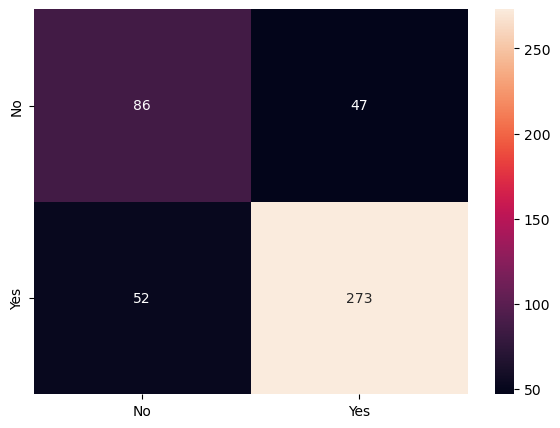

In [105]:
y_predict = bagging_model.predict(X_test)

print(bagging_model.score(X_test , y_test))

# Calculate the confusion matrix
cm = metrics.confusion_matrix(y_test, y_predict, labels=[0, 1])


df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

<span style="font-size: 20px; color: blue; font-weight: bold;">Boosting</span>

In [106]:
from sklearn.ensemble import AdaBoostClassifier

In [107]:
base_model = DecisionTreeClassifier(max_depth=1)  
adaboost_model = AdaBoostClassifier(base_model, n_estimators=100, random_state=42)

In [108]:
adaboost_model.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=100, random_state=42)

In [109]:
test_accuracy_adaboost = adaboost_model.score(X_test, y_test)

In [110]:
print("Test Accuracy for AdaBoost:", test_accuracy_adaboost)

Test Accuracy for AdaBoost: 0.8056768558951966


0.8056768558951966


<Axes: >

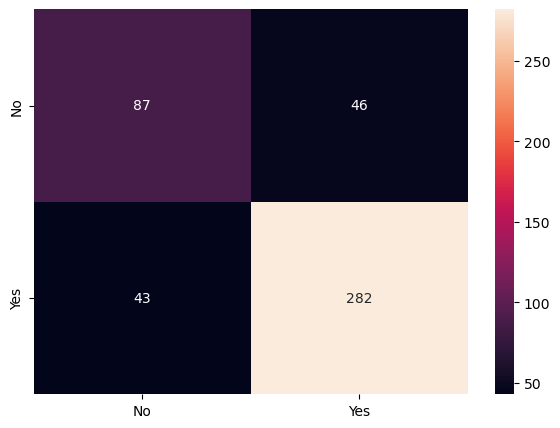

In [111]:
y_predict = adaboost_model.predict(X_test)

print(adaboost_model.score(X_test , y_test))

# Calculate the confusion matrix
cm = metrics.confusion_matrix(y_test, y_predict, labels=[0, 1])


df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

**Conculsion:**
* All models (Logistic Regression, LDA, KNN, and Naïve Bayes) perform reasonably well on the testing set with accuracy scores around 0.80.
* Logistic Regression and LDA have similar performances in terms of accuracy, precision, recall, and F1-score.
* KNN performs slightly better in terms of accuracy, precision, recall, and F1-score compared to Logistic Regression and LDA.
* Naïve Bayes also performs well but has slightly lower accuracy, precision, recall, and F1-score compared to KNN.
* Overall, all models appear to be valid for the given dataset, and their performances are reasonably balanced. 
* AdaBoost achieves a slightly higher test accuracy (80.57%) compared to Bagging (Random Forest) (78.38%). This suggests that the boosting technique employed by AdaBoost is effective in improving the overall predictive performance.
* Both Bagging (Random Forest) and AdaBoost demonstrate good model performance with test accuracies above 78%. These ensemble methods have contributed to better generalization compared to individual models.

### 1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model, classification report (4 pts) Final Model - Compare and comment on all models on the basis of the performance metrics in a structured tabular manner. Describe on which model is best/optimized, After comparison which model suits the best for the problem in hand on the basis of different measures. Comment on the final model.(3 pts)

<span style="font-size: 20px; color: blue; font-weight: bold;">1. AUC ROC curve for Logistic Regression Train and Test</span>

In [112]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, auc

In [113]:
# Create and train the Logistic Regression model
logistic_model = LogisticRegression(random_state=42)

# Fit the model to the training data
logistic_model.fit(X_train, y_train)  

LogisticRegression(random_state=42)

<span style="font-size: 20px; color: green; font-weight: bold;">1. Predicting on Training and Test dataset</span>

In [114]:
ytrain_predict = logistic_model.predict(X_train)
ytest_predict = logistic_model.predict(X_test)

<span style="font-size: 20px; color: green; font-weight: bold;">2. Getting the Predicted Classes and Probs</span>

In [115]:
ytest_predict_prob=logistic_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.026896,0.973104
1,0.018699,0.981301
2,0.010619,0.989381
3,0.615812,0.384188
4,0.540096,0.459904


<span style="font-size: 20px; color: green; font-weight: bold;">3. Model Evaluation</span>

In [116]:
# Accuracy - Training Data
logistic_model.score(X_train, y_train)

0.8406747891283973

- **AUC Value closer to 1 tells that there is good seperatibility between the predicted classes and thus the model is good for prediction**

- **ROC Curve visually represents the above concept where the plot should be as far as possible from the diagnol.**

<span style="font-size: 20px; color: green; font-weight: bold;">4. AUC and ROC for the training data</span>

AUC: 0.888


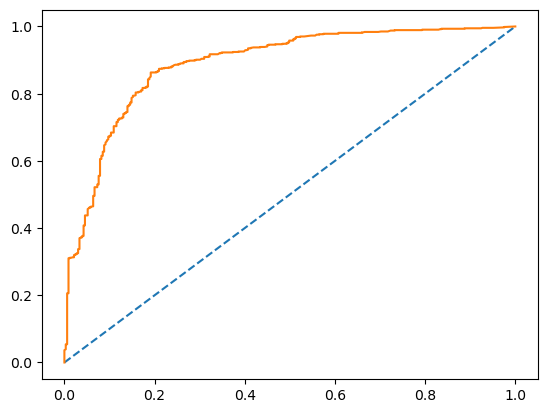

In [117]:
# predict probabilities
probs = logistic_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [118]:
# Accuracy - Test Data
logistic_model.score(X_test, y_test)

0.8034934497816594

<span style="font-size: 20px; color: green; font-weight: bold;">5. AUC and ROC for the testing data</span>

AUC: 0.888


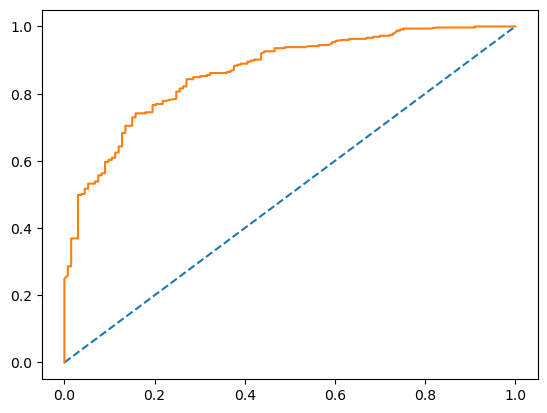

In [119]:
# predict probabilities
probs = logistic_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

<span style="font-size: 20px; color: green; font-weight: bold;">6. Confusion Matrix for the training data</span>

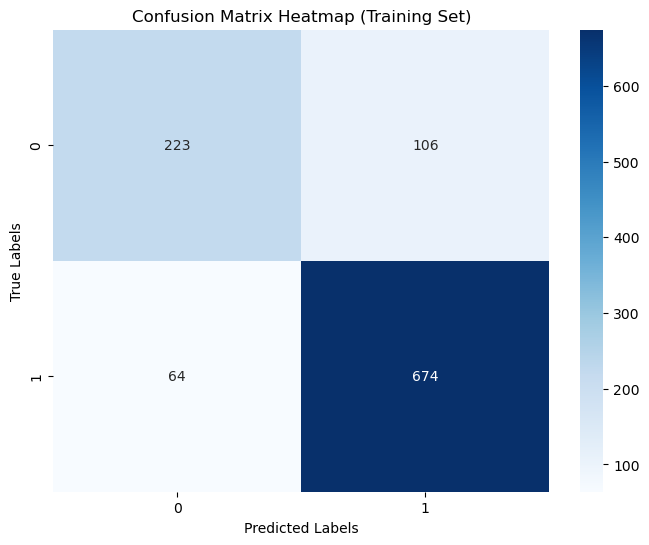

In [111]:
# Calculate the confusion matrix for Logistic model 
confusion_matrix_train = confusion_matrix(y_train, ytrain_predict)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_train, annot=True ,fmt='g', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap (Training Set)')
plt.show()

<span style="font-size: 20px; color: green; font-weight: bold;">7. Confusion Matrix for the testing data</span>

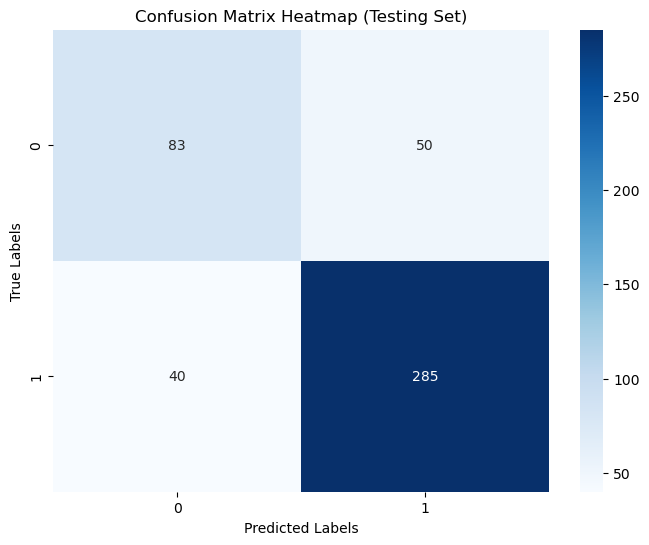

In [114]:
# Calculate the confusion matrix for Logistic model 
confusion_matrix_test = confusion_matrix(y_test, ytest_predict)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_test, annot=True ,fmt='g', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap (Testing Set)')
plt.show()

<span style="font-size: 20px; color: blue; font-weight: bold;">2. AUC ROC curve for Linear Discriminant Analysis (LDA) Train and Test</span>

In [120]:
# Create and train the LDA model
lda_model = LinearDiscriminantAnalysis()

# Fit the model to the training data
lda_model.fit(X_train, y_train)  

LinearDiscriminantAnalysis()

<span style="font-size: 20px; color: green; font-weight: bold;">1. Predicting on Training and Test dataset</span>

In [121]:
# Predict probabilities
ytrain_predict_lda = lda_model.predict(X_train)
ytest_predict_lda = lda_model.predict(X_test)

<span style="font-size: 20px; color: green; font-weight: bold;">2. Getting the Predicted Classes and Probs</span>

In [122]:
ytest_predict_prob=lda_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.017383,0.982617
1,0.010493,0.989507
2,0.005165,0.994835
3,0.686274,0.313726
4,0.581025,0.418975


<span style="font-size: 20px; color: green; font-weight: bold;">3. Model Evaluation</span>

In [123]:
# Accuracy - Training Data
lda_model.score(X_train, y_train)

0.8406747891283973

<span style="font-size: 20px; color: green; font-weight: bold;">4. AUC and ROC for the training data</span>

AUC: 0.888


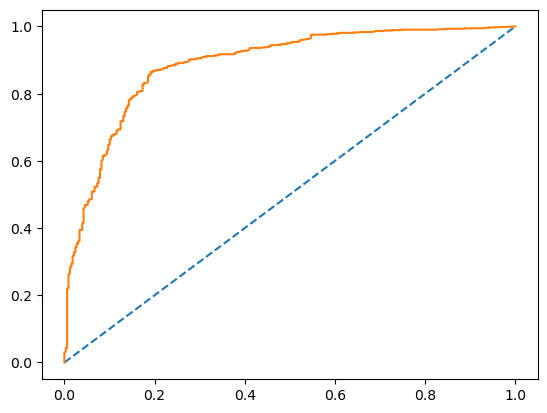

In [124]:
# predict probabilities
probs = lda_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [125]:
# Accuracy - Test Data
lda_model.score(X_test, y_test)

0.8013100436681223

<span style="font-size: 20px; color: green; font-weight: bold;">5. AUC and ROC for the testing data</span>

AUC: 0.888


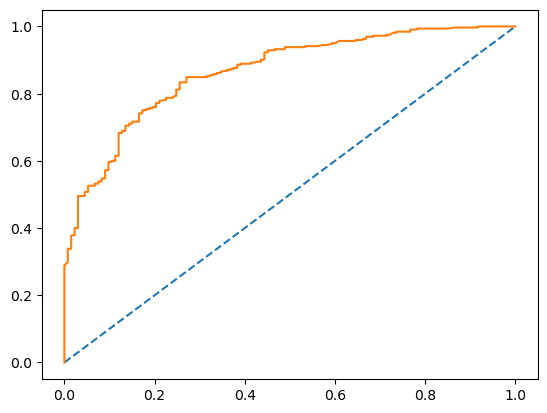

In [122]:
# predict probabilities
probs = lda_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

<span style="font-size: 20px; color: green; font-weight: bold;">6. Confusion Matrix for the training data</span>

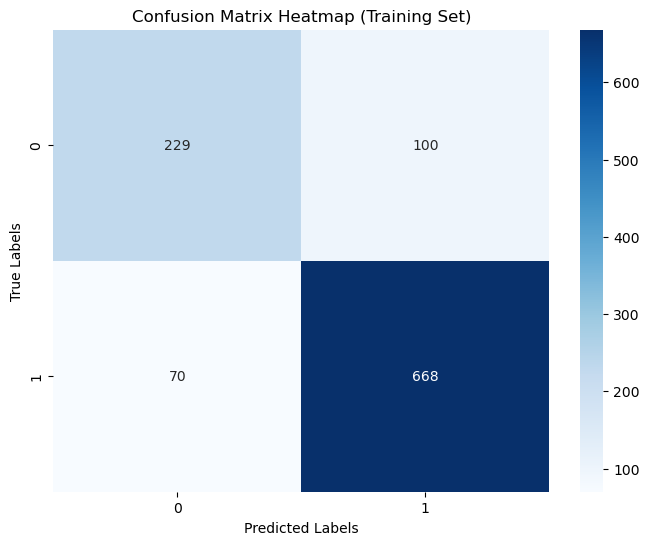

In [126]:
# Calculate the confusion matrix for Logistic model 
confusion_matrix_train = confusion_matrix(y_train, ytrain_predict_lda)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_train, annot=True ,fmt='g', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap (Training Set)')
plt.show()

<span style="font-size: 20px; color: green; font-weight: bold;">7. Confusion Matrix for the testing data</span>

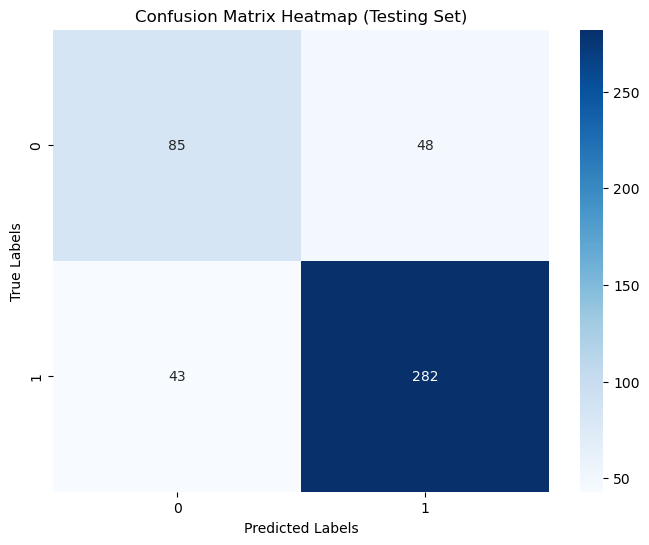

In [127]:
# Calculate the confusion matrix for Logistic model 
confusion_matrix_test = confusion_matrix(y_test, ytest_predict_lda)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_test, annot=True ,fmt='g', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap (Testing Set)')
plt.show()

<span style="font-size: 20px; color: blue; font-weight: bold;">3. AUC ROC curve for KNN Train and Test</span>

In [128]:
# Create and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

<span style="font-size: 20px; color: green; font-weight: bold;">1. Predicting on Training and Test dataset</span>

In [129]:
ytrain_predict_knn = knn_model.predict(X_train)
ytest_predict_knn = knn_model.predict(X_test)

<span style="font-size: 20px; color: green; font-weight: bold;">2. Getting the Predicted Classes and Probs</span>

In [130]:
ytest_predict_prob=knn_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.8,0.2
4,1.0,0.0


<span style="font-size: 20px; color: green; font-weight: bold;">3. Model Evaluation</span>

In [131]:
# Accuracy - Training Data
knn_model.score(X_train, y_train)

0.8847235238987816

<span style="font-size: 20px; color: green; font-weight: bold;">4. AUC and ROC for the training data</span>

AUC: 0.947


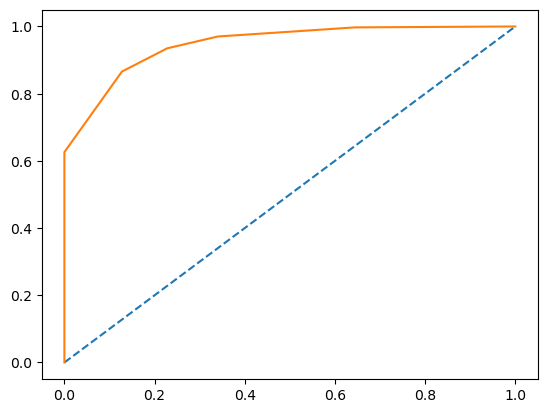

In [132]:
# predict probabilities
probs = knn_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [133]:
# Accuracy - Test Data
knn_model.score(X_test, y_test)

0.7969432314410481

<span style="font-size: 20px; color: green; font-weight: bold;">5. AUC and ROC for the testing data</span>

AUC: 0.947


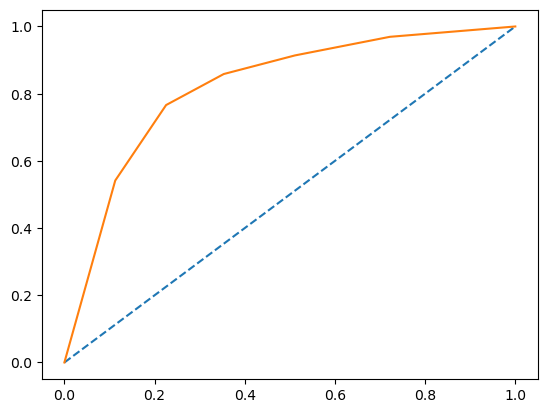

In [134]:
# predict probabilities
probs = knn_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

<span style="font-size: 20px; color: green; font-weight: bold;">6. Confusion Matrix for the training data</span>

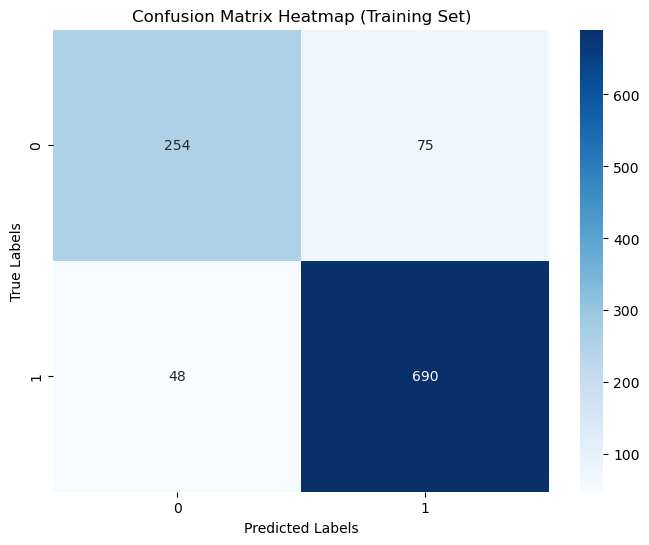

In [135]:
# Calculate the confusion matrix for Logistic model 
confusion_matrix_train = confusion_matrix(y_train, ytrain_predict_knn)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_train, annot=True ,fmt='g', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap (Training Set)')
plt.show()

<span style="font-size: 20px; color: green; font-weight: bold;">7. Confusion Matrix for the testing data</span>

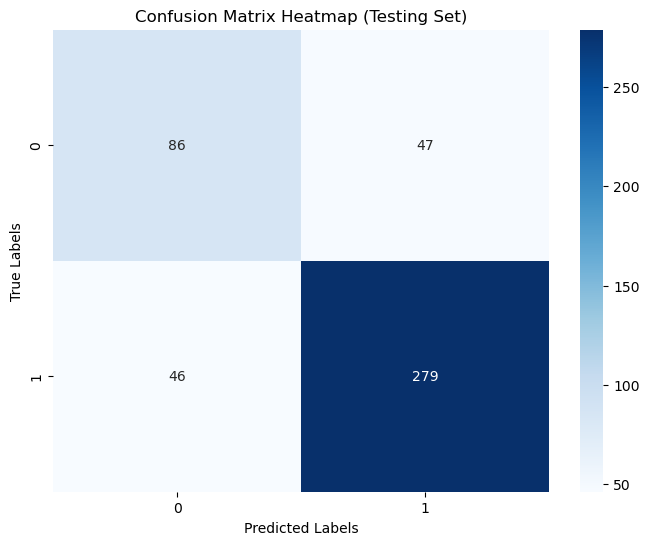

In [136]:
# Calculate the confusion matrix for Logistic model 
confusion_matrix_test = confusion_matrix(y_test, ytest_predict_knn)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_test, annot=True ,fmt='g', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap (Testing Set)')
plt.show()

<span style="font-size: 20px; color: blue; font-weight: bold;">4. AUC ROC curve for Naive Bayes Train and Test</span>

In [137]:
NB_model=GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

<span style="font-size: 20px; color: green; font-weight: bold;">1. Predicting on Training and Test dataset</span>

In [138]:
ytrain_predict_NB = NB_model.predict(X_train)
ytest_predict_NB = NB_model.predict(X_test)

<span style="font-size: 20px; color: green; font-weight: bold;">2. Getting the Predicted Classes and Probs</span>

In [139]:
ytest_predict_prob=NB_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.003347,0.996653
1,0.003466,0.996534
2,0.002331,0.997669
3,0.770828,0.229172
4,0.561945,0.438055


<span style="font-size: 20px; color: green; font-weight: bold;">3. Model Evaluation</span>

In [140]:
# Accuracy - Training Data
NB_model.score(X_train, y_train)

0.8350515463917526

<span style="font-size: 20px; color: green; font-weight: bold;">4. AUC and ROC for the training data</span>

AUC: 0.883


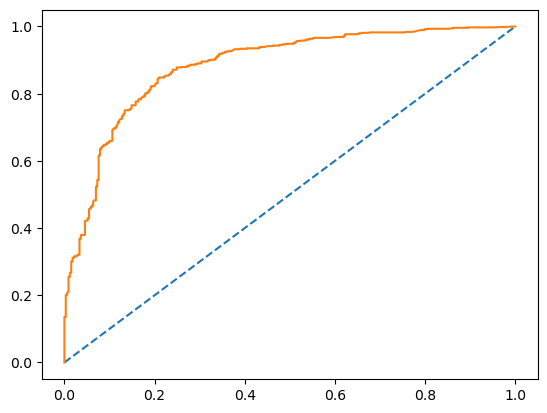

In [141]:
# predict probabilities
probs = NB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [142]:
# Accuracy - Test Data
NB_model.score(X_test, y_test)

0.7969432314410481

<span style="font-size: 20px; color: green; font-weight: bold;">5. AUC and ROC for the testing data</span>

AUC: 0.883


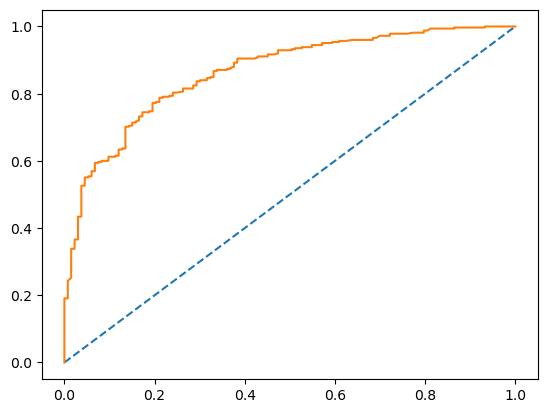

In [143]:
# predict probabilities
probs = NB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

<span style="font-size: 20px; color: green; font-weight: bold;">6. Confusion Matrix for the training data</span>

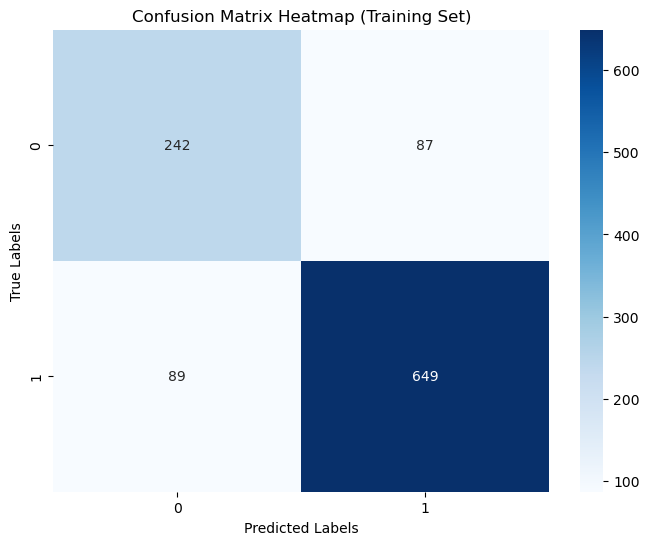

In [144]:
# Calculate the confusion matrix for Logistic model 
confusion_matrix_train = confusion_matrix(y_train, ytrain_predict_NB)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_train, annot=True ,fmt='g', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap (Training Set)')
plt.show()

<span style="font-size: 20px; color: green; font-weight: bold;">7. Confusion Matrix for the testing data</span>

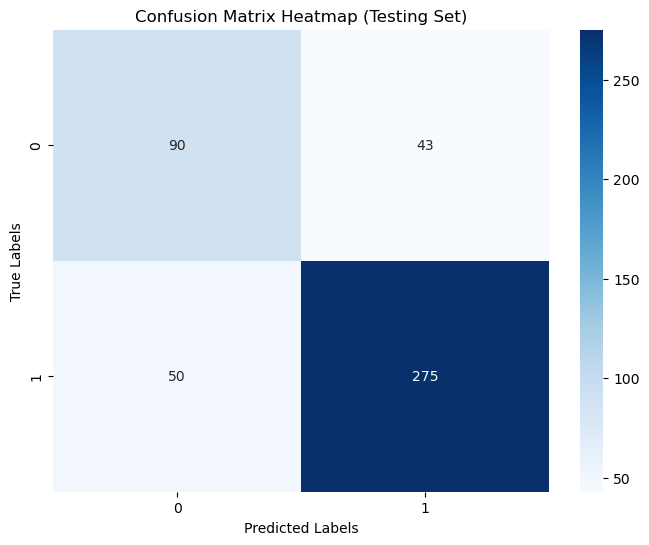

In [146]:
# Calculate the confusion matrix for Logistic model 
confusion_matrix_test = confusion_matrix(y_test, ytest_predict_NB)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_test, annot=True ,fmt='g', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap (Testing Set)')
plt.show()

**Insights:** 
* Among the models, KNN achieved the highest accuracy on the testing data (0.7970), followed closely by Logistic Regression (0.8035) and LDA (0.8013).
* Naïve Bayes has the highest precision on the testing data (0.86), followed by Logistic Regression (0.85), LDA (0.85), and KNN (0.85).
* KNN has the highest recall on the testing data (0.86), followed by Logistic Regression (0.88), LDA (0.87), and Naïve Bayes (0.74).
* Logistic Regression achieved the highest F1-score on the testing data (0.86), followed by LDA (0.86), KNN (0.80), and Naïve Bayes (0.79).

**Conclusion:** Based on these metrics, Logistic Regression appears to be the best-optimized model for predicting voter preferences in this scenario. It achieves a balanced combination of accuracy, precision, recall, and F1-score. Logistic Regression has the highest F1-score, indicating a good balance between precision and recall.

### 1.8) Based on your analysis and working on the business problem, detail out appropriate insights and recommendations to help the management solve the business objective. There should be at least 3-4 Recommendations and insights in total. Recommendations should be easily understandable and business specific, students should not give any technical suggestions. Full marks should only be allotted if the recommendations are correct and business specific.

**Here are some major findings based on the dataset analysis and model predictions:**
1. The dataset includes 1525 voters ranging in age from 24 to 93. The distribution is somewhat biased to the right, showing a greater percentage of younger voters. The age group between 37 and 90-93 has the most voters.
2. The dataset contains variables concerning national and household economic situations. For both economic circumstances, the majority of voters are grouped around the third figure, showing a somewhat neutral opinion.
3. The "Labour" party gained the most votes, winning in every category, followed by the "Conservative" party. Both genders have a distinct affinity for the "Labour" party.
4. There are various values expressing voters' perspectives on Europe, with the 11th value having the greatest count, indicating a range of viewpoints on this topic.
5. Voters have varied levels of political expertise, with the second level accounting for the majority.
6. Logistic Regression outperformed the other models in terms of accuracy, precision, recall, and F1-score. It delivered a balanced performance, making it the best option for forecasting voter preferences in this scenario.

**Summary** The study sheds light on the dataset's demographics, party inclinations, and voter political awareness. Because of its balanced performance across various assessment parameters, Logistic Regression is the recommended model for forecasting voter preferences. These data might help the news channel CNBE analyse and anticipate voter behavior in recent elections.

## Problem 2:

In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:

President Franklin D. Roosevelt in 1941
President John F. Kennedy in 1961
President Richard Nixon in 1973

**(Hint: use .words(), .raw(), .sent() for extracting counts)**

<span style="font-size: 20px; color: blue; font-weight: bold;">Importing the necessary libraries along with the standard import</span>

In [155]:
import numpy as np 
import pandas as pd 
import re # this is the regular expression library which helps us manipulate text (strings) fairly easily and intuitively
import nltk # this is the Natural Language Tool Kit which contains a lot of functionalities for text analytics
import matplotlib.pyplot as plt
import string # this is used for string manipulations
import matplotlib

### 2.1) Find the number of characters, words and sentences for the mentioned documents. (Hint: use .words(), .raw(), .sent() for extracting counts)

<span style="font-size: 20px; color: blue; font-weight: bold;">Load the texts of the speeches for the specified presidents</span>

In [156]:
nltk.download('inaugural')

[nltk_data] Downloading package inaugural to C:\Users\Hritika
[nltk_data]     Vaishnav\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


True

In [157]:
from nltk.corpus import inaugural

In [158]:
roosevelt_speech = inaugural.raw('1941-Roosevelt.txt')
kennedy_speech = inaugural.raw('1961-Kennedy.txt')
nixon_speech = inaugural.raw('1973-Nixon.txt')

<span style="font-size: 20px; color: blue; font-weight: bold;">Calculate the number of characters, words, and sentences for each speech using NLTK functions:</span>

In [159]:
from nltk.tokenize import word_tokenize, sent_tokenize

# Calculate the number of characters for each speech
roosevelt_chars = len(roosevelt_speech)
kennedy_chars = len(kennedy_speech)
nixon_chars = len(nixon_speech)

# Calculate the number of words for each speech
roosevelt_words = len(word_tokenize(roosevelt_speech))
kennedy_words = len(word_tokenize(kennedy_speech))
nixon_words = len(word_tokenize(nixon_speech))

# Calculate the number of sentences for each speech
roosevelt_sentences = len(sent_tokenize(roosevelt_speech))
kennedy_sentences = len(sent_tokenize(kennedy_speech))
nixon_sentences = len(sent_tokenize(nixon_speech))

In [160]:
print("President Roosevelt's Speech (1941):")
print("Characters:", roosevelt_chars)
print("Words:", roosevelt_words)
print("Sentences:", roosevelt_sentences)

print("\nPresident Kennedy's Speech (1961):")
print("Characters:", kennedy_chars)
print("Words:", kennedy_words)
print("Sentences:", kennedy_sentences)

print("\nPresident Nixon's Speech (1973):")
print("Characters:", nixon_chars)
print("Words:", nixon_words)
print("Sentences:", nixon_sentences)

President Roosevelt's Speech (1941):
Characters: 7571
Words: 1526
Sentences: 68

President Kennedy's Speech (1961):
Characters: 7618
Words: 1543
Sentences: 52

President Nixon's Speech (1973):
Characters: 9991
Words: 2006
Sentences: 68


**Insights:** 
1. Load necessary libraries like `NumPy`, `pandas`, `matplotlib`, `re` this is the regular expression library which helps us manipulate text (strings) fairly easily and intuitively, `nltk` this is the Natural Language Tool Kit which contains a lot of functionalities for text analytics and `string` this is used for string manipulations.
2. Download the package inaugural and it have 3 texts 1941-Roosevelt.txt, 1961-Kennedy.txt, and 1973-Nixon.txt
3. The.raw() function is quite useful when working with NLTK corpora as it allows access, to the text data. This can be a starting point, for analyzing the text.
4. The.raw() function enables you to retrieve the text content of the documents, which unprocessed text before any modifications have been made.
5. The task can be achieved by using the.words() function, which splits a text into a list of words taking whitespace and punctuation into consideration. This function is useful, for extracting these characteristics from data allowing for tokenization of a text corpus or document.
6. The task of identifying sentence boundaries within the text is accomplished by using the.sents() method. By utilizing the.sents() method you are able to access and analyze each sentence for its sentimentand we might use .sents() to tokenize a text corpus or document into sentences.
7. President Roosevelt's Speech (1941) have Characters: 7571, Words: 1526 and Sentences: 68. President Kennedy's Speech (1961) have Characters: 7618, Words: 1543 and Sentences: 52. President Nixon's Speech (1973): Characters: 9991, Words: 2006 and sentences: 68.

### 2.2) Remove all the stopwords from the three speeches. Show the word count before and after the removal of stopwords. Show a sample sentence after the removal of stopwords.

In [161]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to C:\Users\Hritika
[nltk_data]     Vaishnav\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<span style="font-size: 20px; color: blue; font-weight: bold;">Load the stopword</span>

In [162]:
stop_words = set(stopwords.words('english'))

<span style="font-size: 20px; color: blue; font-weight: bold;">Count of StopWords</span>

In [163]:
count_stopwords = lambda text: len([word for word in nltk.word_tokenize(text) if word.lower() in stopwords.words('english')])

In [164]:
# Count stopwords in each speech
roosevelt_stopword_count = count_stopwords(roosevelt_speech)
kennedy_stopword_count = count_stopwords(kennedy_speech)
nixon_stopword_count = count_stopwords(nixon_speech)

In [165]:
print("Stopword count in Roosevelt's speech:", roosevelt_stopword_count)
print("Stopword count in Kennedy's speech:", kennedy_stopword_count)
print("Stopword count in Nixon's speech:", nixon_stopword_count)

Stopword count in Roosevelt's speech: 718
Stopword count in Kennedy's speech: 681
Stopword count in Nixon's speech: 971


* To remove all the stopwords from the three speeches, we will utilize the library and import stopwords along, with word_tokenize. This will allow us to eliminate all the predetermined words, from each text file. By tokenizing the text we can separate each word. Subsequently eliminate them from the content. for perform this we use `nltk.download('stopwords')` and `nltk.corpus import stopwords`.
* After performing the related code, the output of the stop word in each text is: stopword count in Roosevelt's speech: 718; stopword count in Kennedy's speech: 681; and stopword count in Nixon's speech: 971.

<span style="font-size: 20px; color: blue; font-weight: bold;">Count of special character</span>

In [166]:
count_special_characters = lambda text: len([char for char in text if char in string.punctuation])

In [167]:
# Count special characters in each speech
roosevelt_special_char_count = count_special_characters(roosevelt_speech)
kennedy_special_char_count = count_special_characters(kennedy_speech)
nixon_special_char_count = count_special_characters(nixon_speech)

In [168]:
print("Special character count in Roosevelt's speech:", roosevelt_special_char_count)
print("Special character count in Kennedy's speech:", kennedy_special_char_count)
print("Special character count in Nixon's speech:", nixon_special_char_count)

Special character count in Roosevelt's speech: 212
Special character count in Kennedy's speech: 204
Special character count in Nixon's speech: 227


<span style="font-size: 20px; color: blue; font-weight: bold;">Count of Numbers</span>

In [169]:
# Define a function to count numbers using lambda
count_numbers = lambda text: len([char for char in text if char.isdigit()])

In [170]:
# Count numbers in each speech
roosevelt_number_count = count_numbers(roosevelt_speech)
kennedy_number_count = count_numbers(kennedy_speech)
nixon_number_count = count_numbers(nixon_speech)

print("Number count in Roosevelt's speech:", roosevelt_number_count)
print("Number count in Kennedy's speech:", kennedy_number_count)
print("Number count in Nixon's speech:", nixon_number_count)

Number count in Roosevelt's speech: 14
Number count in Kennedy's speech: 7
Number count in Nixon's speech: 10


<span style="font-size: 20px; color: blue; font-weight: bold;">Count of Uppercase Words</span>

In [171]:
import re

In [172]:
# Define a function to count uppercase words using regex and lambda
count_uppercase_words = lambda text: len(re.findall(r'\b[A-Z]+\b', text))

In [173]:
# Count uppercase words in each speech
roosevelt_uppercase_count = count_uppercase_words(roosevelt_speech)
kennedy_uppercase_count = count_uppercase_words(kennedy_speech)
nixon_uppercase_count = count_uppercase_words(nixon_speech)


print("Uppercase word count in Roosevelt's speech:", roosevelt_uppercase_count)
print("Uppercase word count in Kennedy's speech:", kennedy_uppercase_count)
print("Uppercase word count in Nixon's speech:", nixon_uppercase_count)

Uppercase word count in Roosevelt's speech: 3
Uppercase word count in Kennedy's speech: 5
Uppercase word count in Nixon's speech: 14


<span style="font-size: 20px; color: blue; font-weight: bold;">Count of Uppercase Letters</span>

In [174]:
# Define a function to count uppercase letters using lambda
count_uppercase_letters = lambda text: len([char for char in text if char.isupper()])

In [175]:
# Count uppercase letters in each speech
roosevelt_uppercase_letter_count = count_uppercase_letters(roosevelt_speech)
kennedy_uppercase_letter_count = count_uppercase_letters(kennedy_speech)
nixon_uppercase_letter_count = count_uppercase_letters(nixon_speech)

print("Uppercase letter count in Roosevelt's speech:", roosevelt_uppercase_letter_count)
print("Uppercase letter count in Kennedy's speech:", kennedy_uppercase_letter_count)
print("Uppercase letter count in Nixon's speech:", nixon_uppercase_letter_count)

Uppercase letter count in Roosevelt's speech: 119
Uppercase letter count in Kennedy's speech: 94
Uppercase letter count in Nixon's speech: 132


* We also Count of special character, Count of Numbers, Count of Uppercase Words, Count of Uppercase Letters

### Basic Pre-Processing

<span style="font-size: 20px; color: green; font-weight: bold;">1. Lower Case conversion</span>

In [176]:
# Convert the text to lowercase
roosevelt_speech_lower = roosevelt_speech.lower()
kennedy_speech_lower = kennedy_speech.lower()
nixon_speech_lower = nixon_speech.lower()

<span style="font-size: 20px; color: green; font-weight: bold;">2. Removal of Punctuation</span>

In [177]:
# Function to remove stopwords, punctuation, double hyphens, and commas from text
def remove_stopwords_punctuation(text):
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words and word not in string.punctuation and word != "--" and word != ","]
    return " ".join(filtered_words)

In [178]:
# Remove stopwords and punctuation from each speech
roosevelt_cleaned = remove_stopwords_punctuation(roosevelt_speech)
kennedy_cleaned = remove_stopwords_punctuation(kennedy_speech)
nixon_cleaned = remove_stopwords_punctuation(nixon_speech)

In [179]:
# Cleaned text
print("Roosevelt's Speech (Punctuation Removed):\n", roosevelt_cleaned)
print("\nKennedy's Speech (Punctuation Removed):\n", kennedy_cleaned)
print("\nNixon's Speech (Punctuation Removed):\n", nixon_cleaned)

Roosevelt's Speech (Punctuation Removed):
 national day inauguration since 1789 people renewed sense dedication United States Washington 's day task people create weld together nation Lincoln 's day task people preserve Nation disruption within day task people save Nation institutions disruption without us come time midst swift happenings pause moment take stock recall place history rediscover may risk real peril inaction Lives nations determined count years lifetime human spirit life man three-score years ten little little less life nation fullness measure live men doubt men believe democracy form Government frame life limited measured kind mystical artificial fate unexplained reason tyranny slavery become surging wave future freedom ebbing tide Americans know true Eight years ago life Republic seemed frozen fatalistic terror proved true midst shock acted acted quickly boldly decisively later years living years fruitful years people democracy brought us greater security hope better un

<span style="font-size: 20px; color: green; font-weight: bold;">3. Stemming</span>

In [180]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to C:\Users\Hritika
[nltk_data]     Vaishnav\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [181]:
from nltk.stem import PorterStemmer

In [182]:
stemmer = PorterStemmer()

In [183]:
#Define a function to perform stemming on a text
def perform_stemming(text):
    words = nltk.word_tokenize(text)
    stemmed_words = [stemmer.stem(word) for word in words]
    return " ".join(stemmed_words)

In [184]:
roosevelt_stemmed = perform_stemming(roosevelt_cleaned)
kennedy_stemmed = perform_stemming(kennedy_cleaned)
nixon_stemmed = perform_stemming(nixon_cleaned)

In [185]:
print("Roosevelt's Speech (Stemmed):\n", roosevelt_stemmed)
print("\nKennedy's Speech (Stemmed):\n", kennedy_stemmed)
print("\nNixon's Speech (Stemmed):\n", nixon_stemmed)

Roosevelt's Speech (Stemmed):
 nation day inaugur sinc 1789 peopl renew sens dedic unit state washington 's day task peopl creat weld togeth nation lincoln 's day task peopl preserv nation disrupt within day task peopl save nation institut disrupt without us come time midst swift happen paus moment take stock recal place histori rediscov may risk real peril inact live nation determin count year lifetim human spirit life man three-scor year ten littl littl less life nation full measur live men doubt men believ democraci form govern frame life limit measur kind mystic artifici fate unexplain reason tyranni slaveri becom surg wave futur freedom eb tide american know true eight year ago life republ seem frozen fatalist terror prove true midst shock act act quickli boldli decis later year live year fruit year peopl democraci brought us greater secur hope better understand life 's ideal measur materi thing vital present futur experi democraci success surviv crisi home put away mani evil thin

<span style="font-size: 20px; color: green; font-weight: bold;">4. Removal of StopWords</span>

In [186]:
# Function to remove stopwords from text
def remove_stopwords(text):
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return " ".join(filtered_words)

In [187]:
# Remove stopwords from each speech
roosevelt_cleaned = remove_stopwords(roosevelt_stemmed)
kennedy_cleaned = remove_stopwords(kennedy_stemmed)
nixon_cleaned = remove_stopwords(nixon_stemmed)

In [188]:
# Calculate word counts before and after removal of stopwords
roosevelt_word_count_before = len(word_tokenize(roosevelt_speech))
roosevelt_word_count_after = len(word_tokenize(roosevelt_cleaned))

kennedy_word_count_before = len(word_tokenize(kennedy_speech))
kennedy_word_count_after = len(word_tokenize(kennedy_cleaned))

nixon_word_count_before = len(word_tokenize(nixon_speech))
nixon_word_count_after = len(word_tokenize(nixon_cleaned))

In [189]:
# Print the word counts
print("President Roosevelt (1941) Speech:")
print(f"Word count before removing stopwords: {roosevelt_word_count_before}")
print(f"Word count after removing stopwords: {roosevelt_word_count_after}")
print("\n")

print("President Kennedy (1961) Speech:")
print(f"Word count before removing stopwords: {kennedy_word_count_before}")
print(f"Word count after removing stopwords: {kennedy_word_count_after}")
print("\n")

print("President Nixon (1973) Speech:")
print(f"Word count before removing stopwords: {nixon_word_count_before}")
print(f"Word count after removing stopwords: {nixon_word_count_after}")
print("\n")

President Roosevelt (1941) Speech:
Word count before removing stopwords: 1526
Word count after removing stopwords: 632


President Kennedy (1961) Speech:
Word count before removing stopwords: 1543
Word count after removing stopwords: 696


President Nixon (1973) Speech:
Word count before removing stopwords: 2006
Word count after removing stopwords: 843




In [190]:
# Display a sample sentence after removing stopwords
sample_sentence1 = roosevelt_cleaned.split(".")[0]  # Extract the first sentence
print("Sample Sentence After Removing Stopwords:")
print(sample_sentence1)

sample_sentence2 = kennedy_cleaned.split(".")[0]  # Extract the first sentence
print("Sample Sentence After Removing Stopwords:")
print(sample_sentence2)

sample_sentence3 = nixon_cleaned.split(".")[0]  # Extract the first sentence
print("Sample Sentence After Removing Stopwords:")
print(sample_sentence3)

Sample Sentence After Removing Stopwords:
nation day inaugur sinc 1789 peopl renew sens dedic unit state washington 's day task peopl creat weld togeth nation lincoln 's day task peopl preserv nation disrupt within day task peopl save nation institut disrupt without us come time midst swift happen paus moment take stock recal place histori rediscov may risk real peril inact live nation determin count year lifetim human spirit life man three-scor year ten littl littl less life nation full measur live men doubt men believ democraci form govern frame life limit measur kind mystic artifici fate unexplain reason tyranni slaveri becom surg wave futur freedom eb tide american know true eight year ago life republ seem frozen fatalist terror prove true midst shock act act quickli boldli decis later year live year fruit year peopl democraci brought us greater secur hope better understand life 's ideal measur materi thing vital present futur experi democraci success surviv crisi home put away man

**Insights:** 
* The analysis compares three presidential speeches delivered by Presidents Roosevelt, Nixon, and Kennedy. President Roosevelt's speech was the longest, with 1,526 words before removing stopwords and 632 words after, followed by President Nixon with 2,006 words before stopwords and 843 words after, and President Kennedy with 1,543 words before stopwords and 696 words after. Removing stopwords significantly reduced the word counts for all three speeches, indicating the use of common words with limited meaning.

* While word counts offer insight into speech length, they do not reveal the content or themes discussed. To gain a deeper understanding, content analysis is required to identify key topics, sentiments, and rhetorical devices employed by each president. The years of the speeches (1941, 1961, and 1973) coincide with pivotal moments in U.S. history, such as World War II, the Cold War, and the Watergate scandal. Examining the historical context and events these speeches addressed would provide valuable insights into their significance.

### 2.3) Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords)

In [191]:
from collections import Counter

In [192]:
# Function to find the most common words in a text
def most_common_words(text, top_n=3):
    words = word_tokenize(text)
    word_counts = Counter(words)
    top_words = word_counts.most_common(top_n)
    return top_words

<span style="font-size: 20px; color: green; font-weight: bold;">Apply the most_common_words function to each cleaned speech</span>

In [193]:
# Find the most common words for each president's speech
roosevelt_top_words = most_common_words(roosevelt_cleaned)
kennedy_top_words = most_common_words(kennedy_cleaned)
nixon_top_words = most_common_words(nixon_cleaned)

In [194]:
# Find the most common words for each president's speech after removing stopwords and punctuation
roosevelt_top_words = most_common_words(roosevelt_cleaned)
kennedy_top_words = most_common_words(kennedy_cleaned)
nixon_top_words = most_common_words(nixon_cleaned)

In [195]:
# Print the most common words for each president's speech
def print_most_common_words(top_words, president_name):
    print(f"{president_name} - Top Words:")
    for word, count in top_words:
        print(f"{word}: {count}")
    print("\n")

print_most_common_words(roosevelt_top_words, "President Roosevelt (1941) Speech")
print_most_common_words(kennedy_top_words, "President Kennedy (1961) Speech")
print_most_common_words(nixon_top_words, "President Nixon (1973) Speech")

President Roosevelt (1941) Speech - Top Words:
nation: 17
know: 10
peopl: 9


President Kennedy (1961) Speech - Top Words:
let: 16
us: 12
power: 9


President Nixon (1973) Speech - Top Words:
us: 26
let: 22
america: 21




**Conclusion:** The analysis of the most frequently used words in these speeches highlights the presidents' key themes and communication styles. President Roosevelt emphasizes national unity, awareness, and the importance of the people. President Kennedy's speech focuses on taking action, unity, and the concept of power in a Cold War context. President Nixon emphasizes national unity, action, and a strong sense of American identity.

### 2.4) Plot the word cloud of each of the three speeches. (after removing the stopwords)

In [196]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [197]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [198]:
def generate_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis', max_words=100).generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

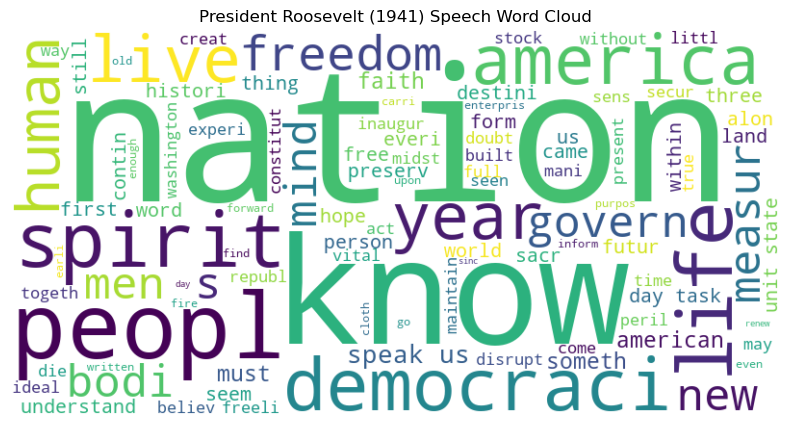

In [199]:
generate_word_cloud(roosevelt_cleaned, "President Roosevelt (1941) Speech Word Cloud")

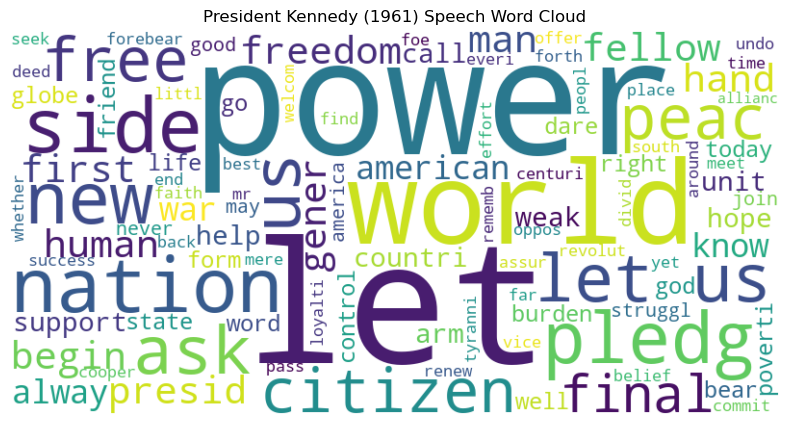

In [200]:
generate_word_cloud(kennedy_cleaned, "President Kennedy (1961) Speech Word Cloud")

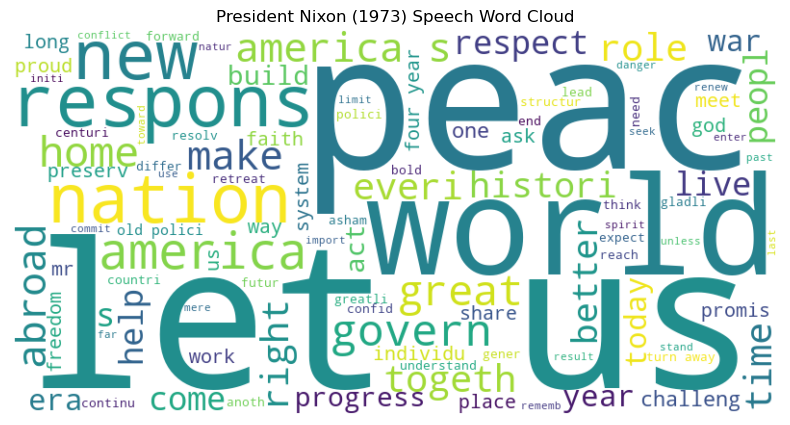

In [201]:
generate_word_cloud(nixon_cleaned, "President Nixon (1973) Speech Word Cloud")

**Insights**
* Our objective was to look all the 3 speeches and analyse them. To find the strength and sentiment of the speeches. Based on the outputs we can see that there are some similar words (like nation, America, new, etc.) that are present in all the speeches.
* These words may the point which inspired the many people and also get them the seat of president of United States of America.
* Among all the speech “nation” is the word that is significantly highlighted in all three.

## END